<a href="https://colab.research.google.com/github/cjsdudwls1/Aflatoxin_analysis/blob/main/3_1_%EB%8C%80%EC%83%81%EA%B8%B0%EA%B0%84_%EC%84%A0%EC%A0%95~~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ADASYN적용한 원본데이터: 0.123
##ADASYN적용한 특성공학데이터: 0.124
##특성공학중 최고 조합(9개변수): 0.145749
##특성공학 데이터 전체: 0.1457
##그냥 원본(전처리and다운사이징): 0.150154


##
# **특성공학으로 성능이 올랐던 떄는, SMOTE적용+결과값을 활용한 부적합율 조정을 선행한 경우임.**

# 3.1 대상기간 선정

In [ ]:
import pandas as pd

merged_data= pd.read_pickle("/content/drive/MyDrive/merged_data.pkl", compression='gzip')
merged_data

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,...,tmprt_150_50,tmprt_150_51,tmprt_150_52,tmprt_150_53,tmprt_150_54,tmprt_150_55,tmprt_150_56,tmprt_150_57,tmprt_150_58,tmprt_150_59
0,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
1,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
2,0,False,False,False,False,True,False,False,False,False,...,13.9,13.9,12.8,12.4,12.8,11.2,10.4,14.3,14.2,12.7
3,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
4,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337244,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337245,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337246,0,False,False,False,True,False,False,False,False,False,...,14.4,16.9,15.2,18.3,18.1,15.9,16.4,15.0,14.9,15.7


## 10일 단위로 60일까지의 데이터의 XGBoost 모델의 성능 변화 시각화 및 평가

In [ ]:
%pip install xgboost imbalanced-learn -q

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

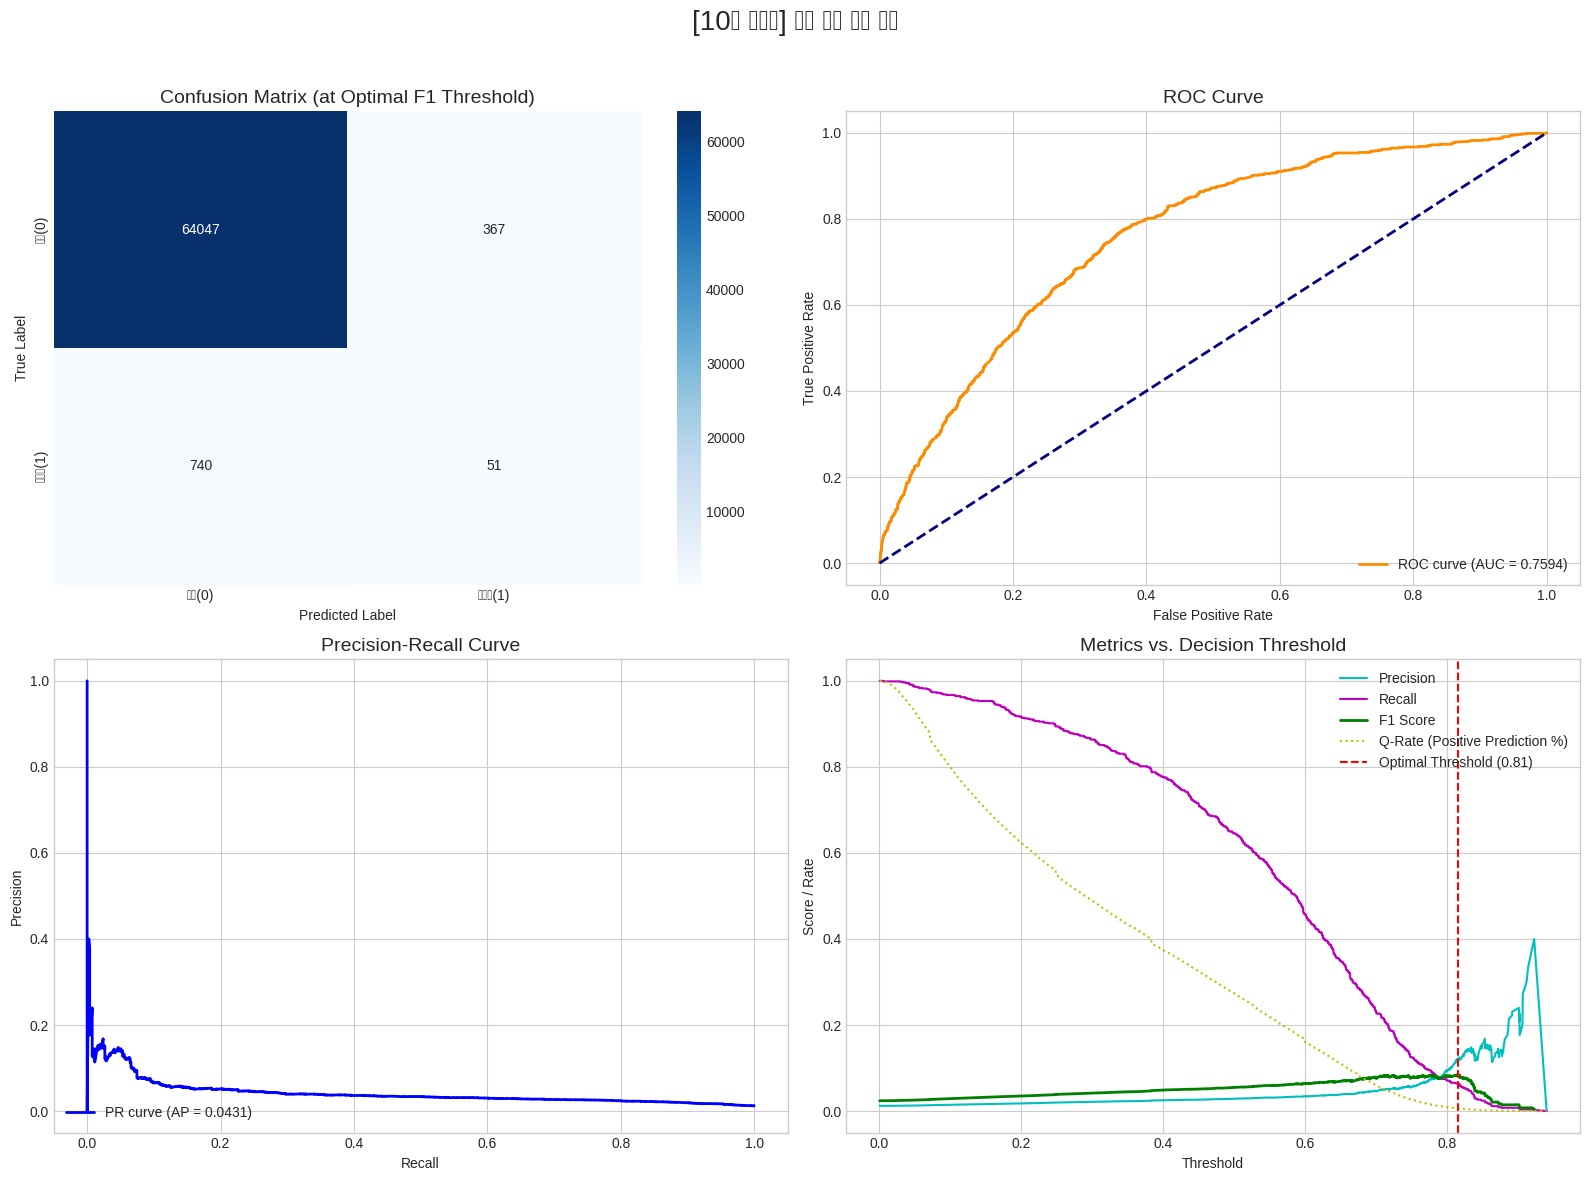


[10일 데이터] Classification Report (Optimal Threshold):

              precision    recall  f1-score   support

           0     0.9886    0.9943    0.9914     64414
           1     0.1220    0.0645    0.0844       791

    accuracy                         0.9830     65205
   macro avg     0.5553    0.5294    0.5379     65205
weighted avg     0.9781    0.9830    0.9804     65205




================== 🚀 20일 데이터 평가 시작 🚀 ==================
사용된 특징 개수: 213개
F1 Score를 최대화하는 최적 임계값: 0.8111


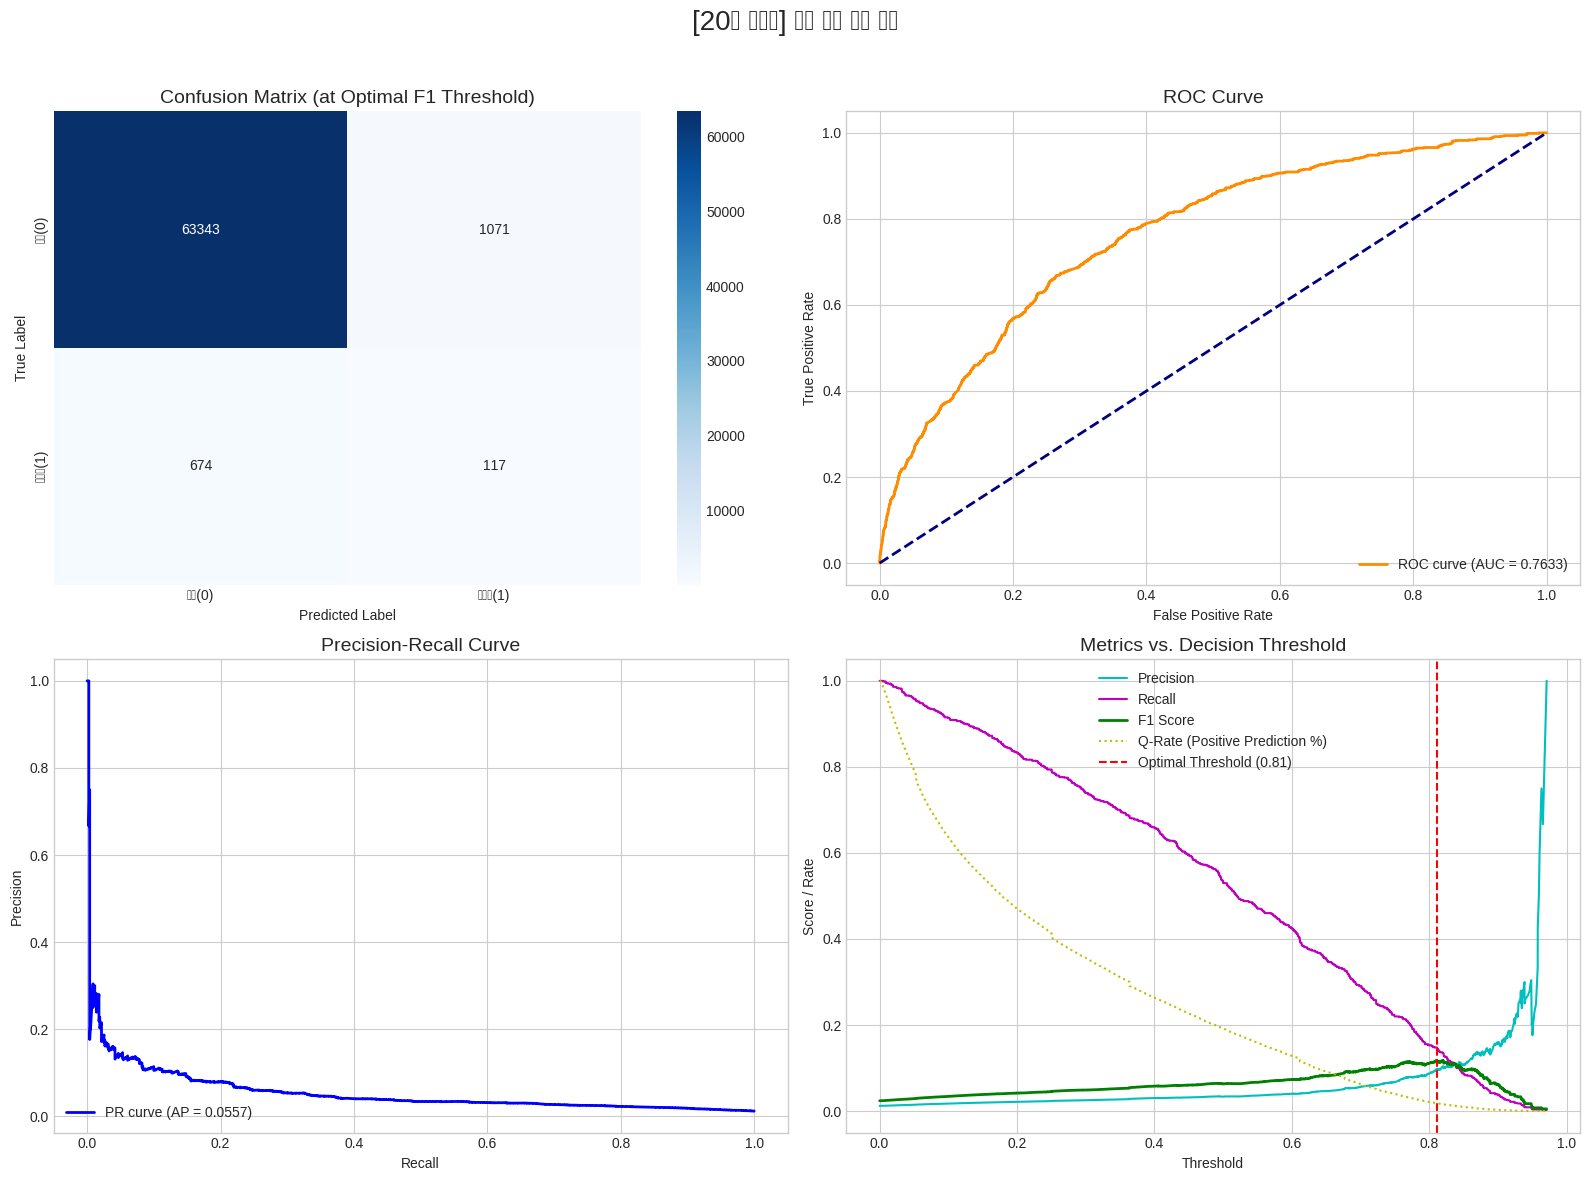


[20일 데이터] Classification Report (Optimal Threshold):

              precision    recall  f1-score   support

           0     0.9895    0.9834    0.9864     64414
           1     0.0985    0.1479    0.1182       791

    accuracy                         0.9732     65205
   macro avg     0.5440    0.5656    0.5523     65205
weighted avg     0.9787    0.9732    0.9759     65205




================== 🚀 30일 데이터 평가 시작 🚀 ==================
사용된 특징 개수: 303개
F1 Score를 최대화하는 최적 임계값: 0.8485


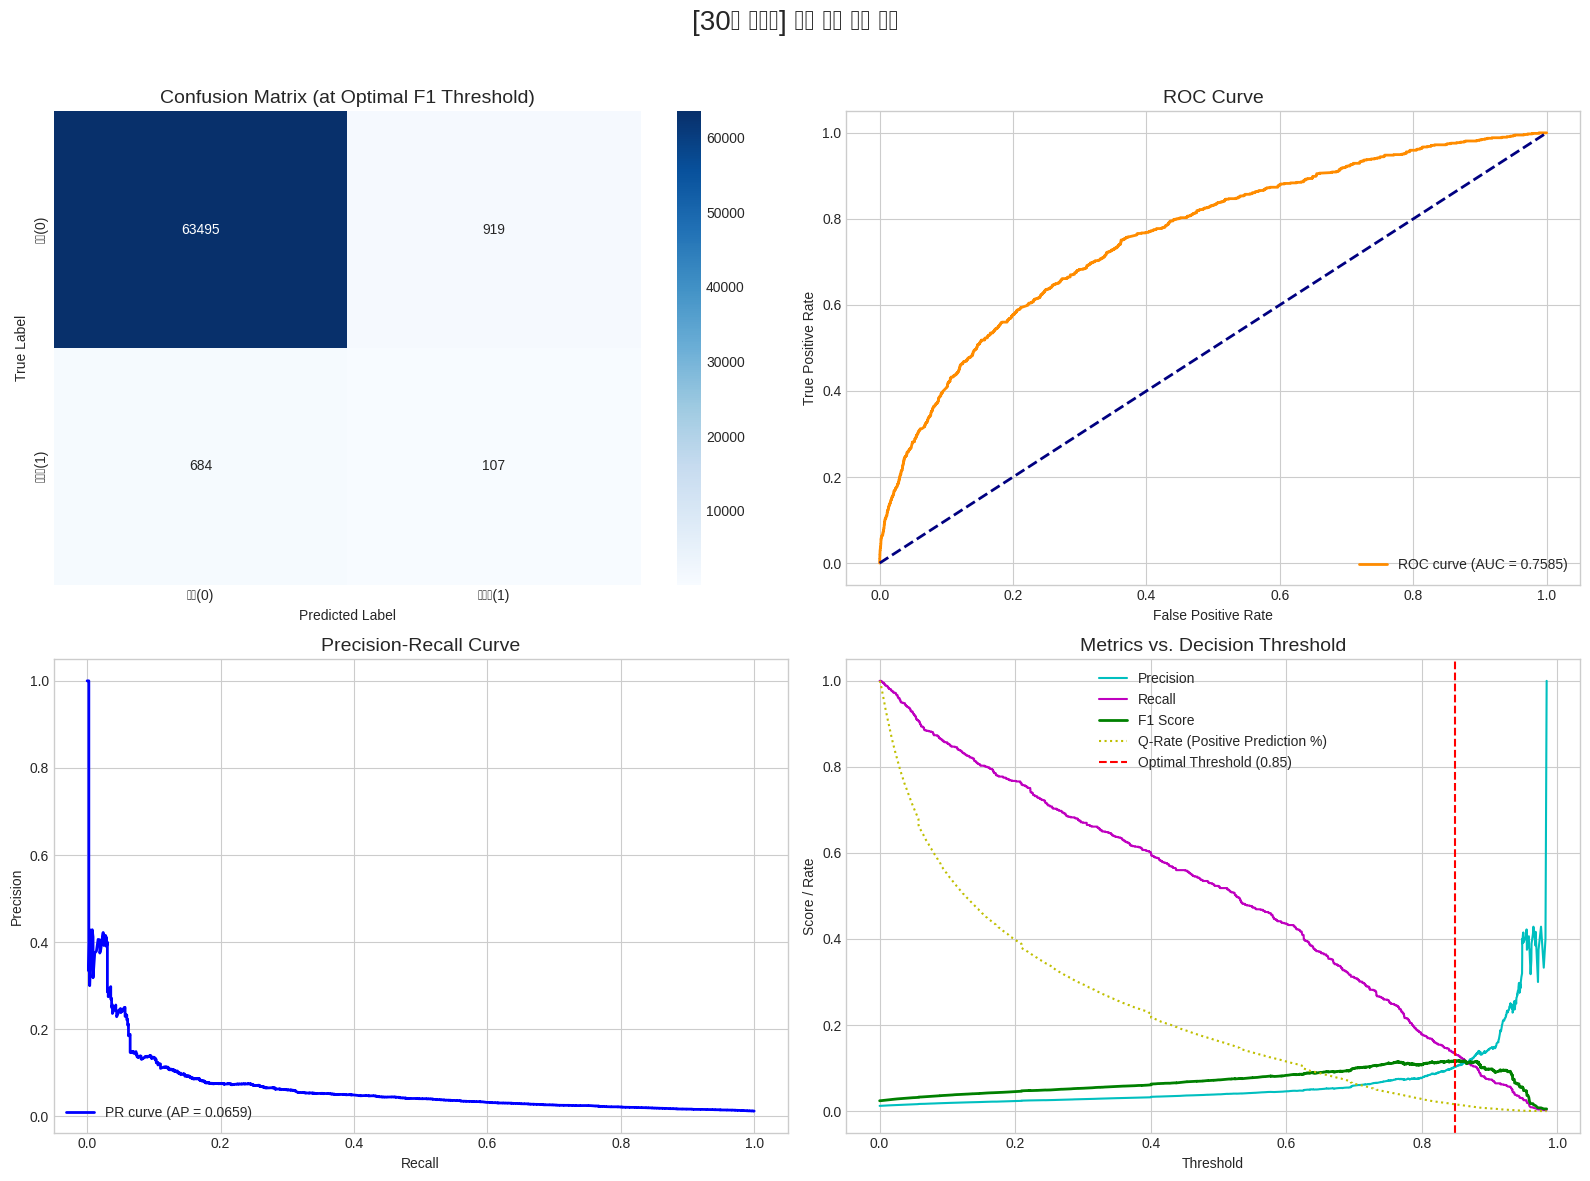


[30일 데이터] Classification Report (Optimal Threshold):

              precision    recall  f1-score   support

           0     0.9893    0.9857    0.9875     64414
           1     0.1043    0.1353    0.1178       791

    accuracy                         0.9754     65205
   macro avg     0.5468    0.5605    0.5527     65205
weighted avg     0.9786    0.9754    0.9770     65205




================== 🚀 40일 데이터 평가 시작 🚀 ==================
사용된 특징 개수: 393개
F1 Score를 최대화하는 최적 임계값: 0.8222


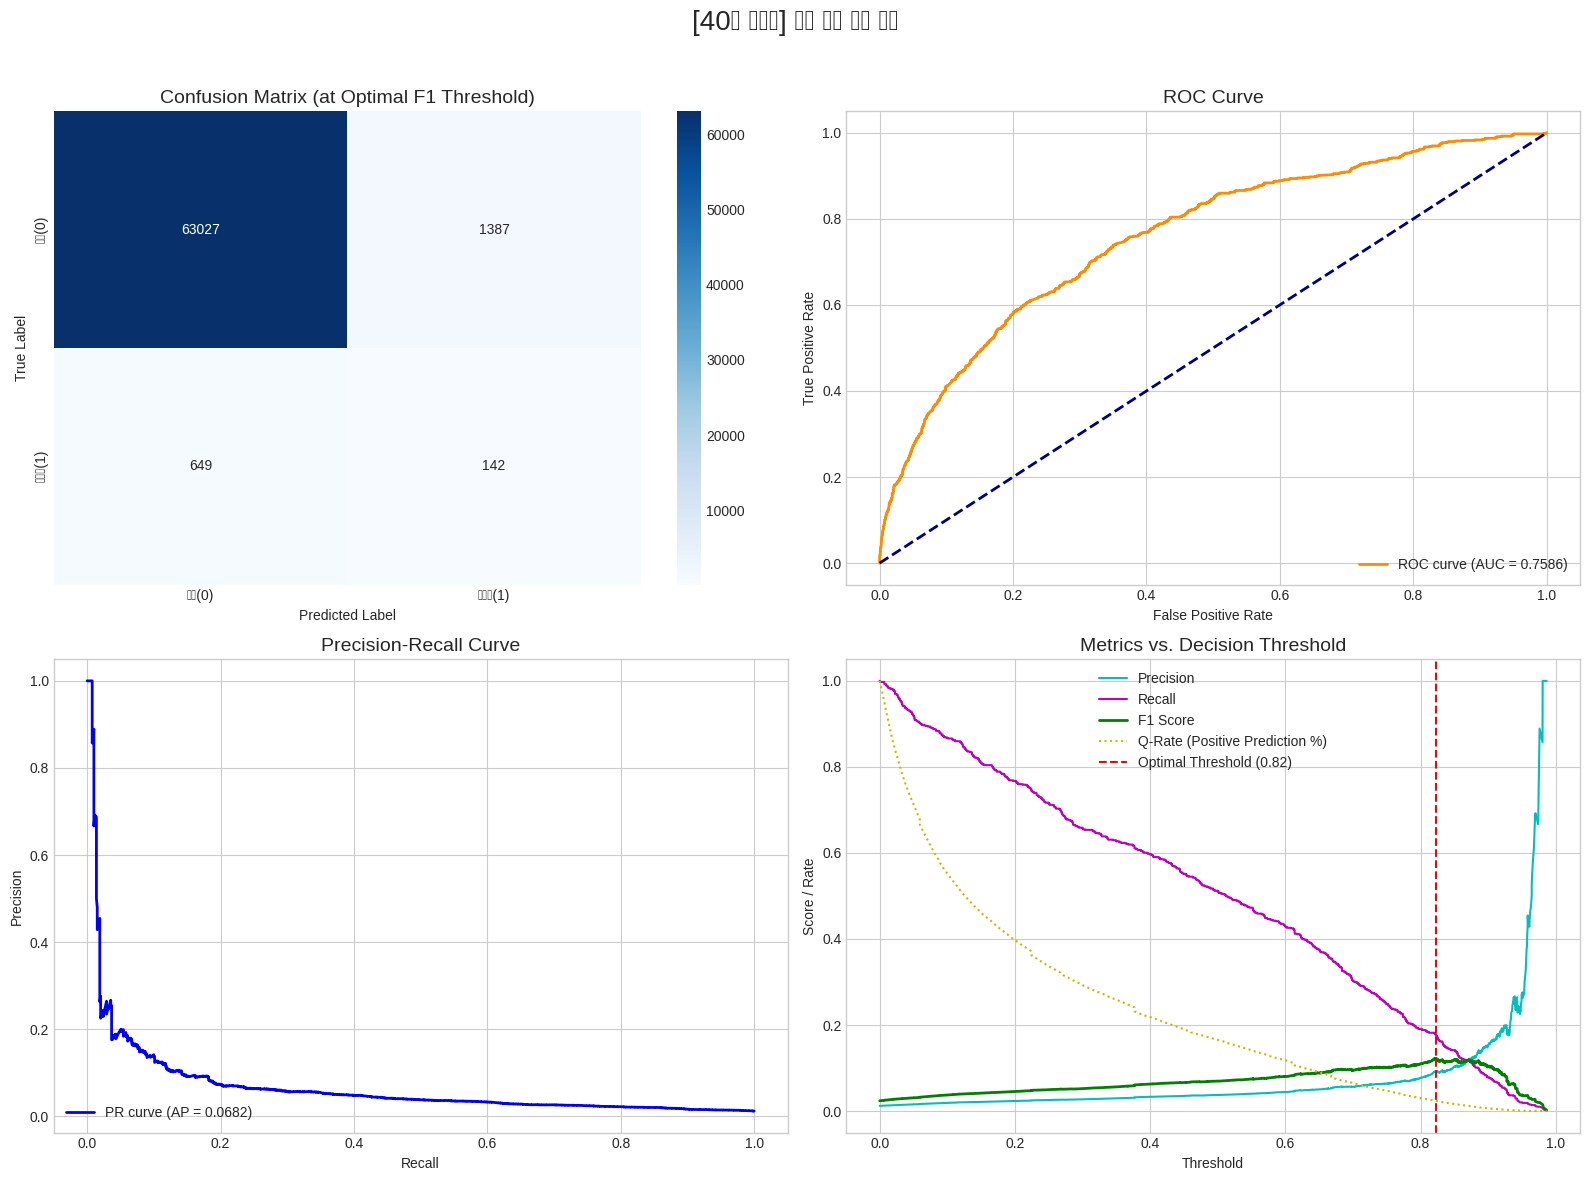


[40일 데이터] Classification Report (Optimal Threshold):

              precision    recall  f1-score   support

           0     0.9898    0.9785    0.9841     64414
           1     0.0929    0.1795    0.1224       791

    accuracy                         0.9688     65205
   macro avg     0.5413    0.5790    0.5533     65205
weighted avg     0.9789    0.9688    0.9737     65205




================== 🚀 50일 데이터 평가 시작 🚀 ==================
사용된 특징 개수: 483개
F1 Score를 최대화하는 최적 임계값: 0.8879


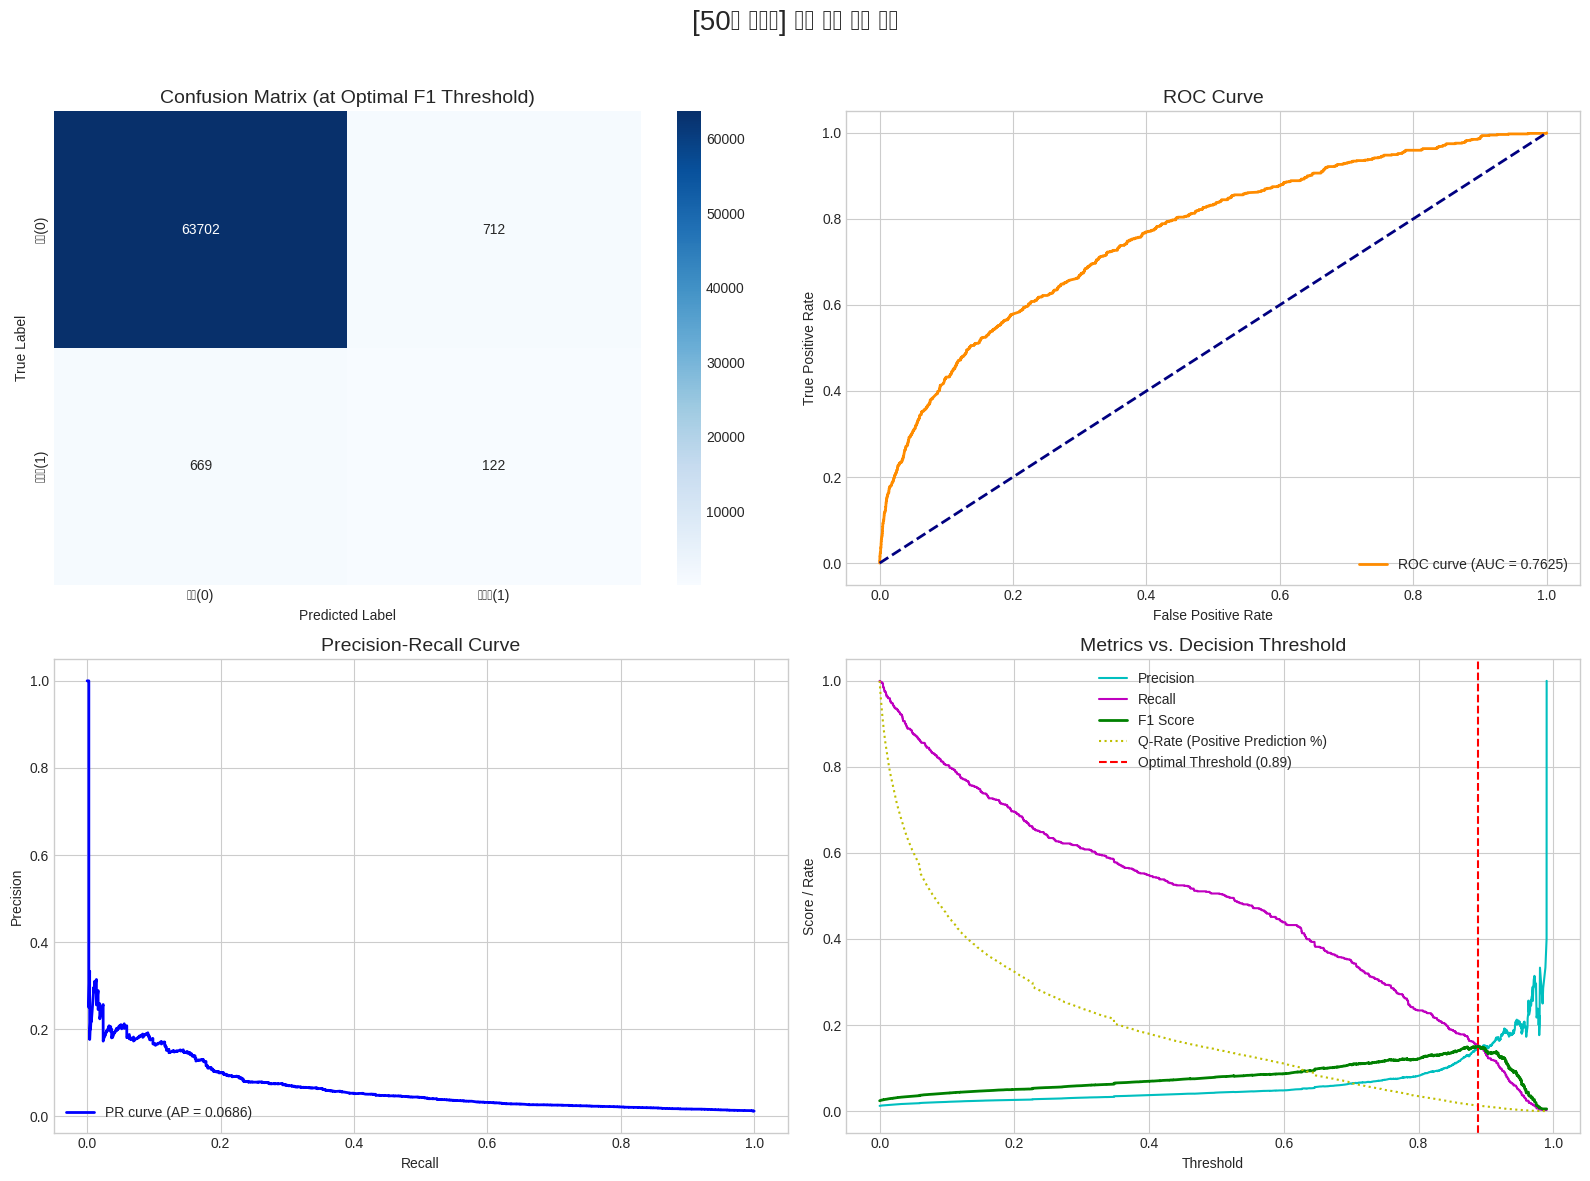


[50일 데이터] Classification Report (Optimal Threshold):

              precision    recall  f1-score   support

           0     0.9896    0.9889    0.9893     64414
           1     0.1463    0.1542    0.1502       791

    accuracy                         0.9788     65205
   macro avg     0.5679    0.5716    0.5697     65205
weighted avg     0.9794    0.9788    0.9791     65205




================== 🚀 60일 데이터 평가 시작 🚀 ==================
사용된 특징 개수: 573개
F1 Score를 최대화하는 최적 임계값: 0.7473


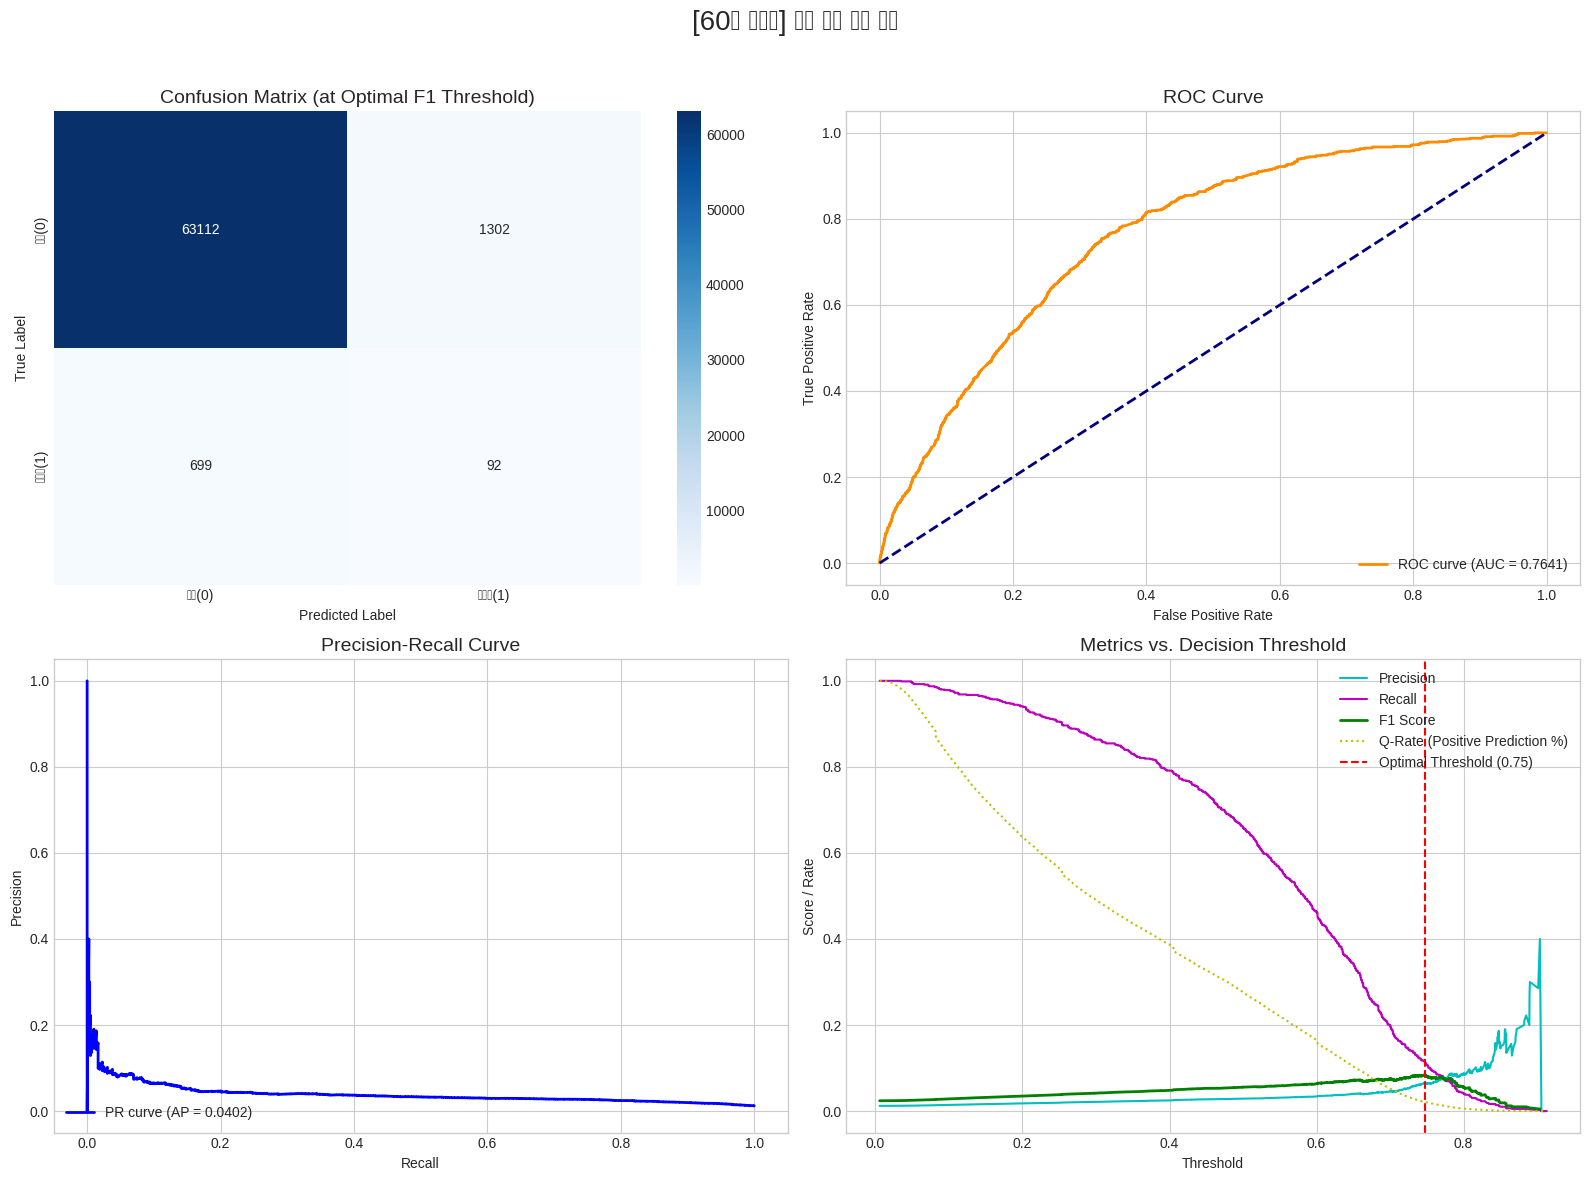


[60일 데이터] Classification Report (Optimal Threshold):

              precision    recall  f1-score   support

           0     0.9890    0.9798    0.9844     64414
           1     0.0660    0.1163    0.0842       791

    accuracy                         0.9693     65205
   macro avg     0.5275    0.5480    0.5343     65205
weighted avg     0.9778    0.9693    0.9735     65205






================== ✅ 최종 성능 요약 ✅ ==================
      F1_Score     AUROC  Avg_Precision  Optimal_Threshold
days                                                      
10    0.084367  0.759405       0.043099           0.814988
20    0.118242  0.763295       0.055691           0.811067
30    0.117777  0.758542       0.065925           0.848541
40    0.122414  0.758570       0.068222           0.822200
50    0.150154  0.762500       0.068600           0.887872
60    0.084211  0.764116       0.040232           0.747296


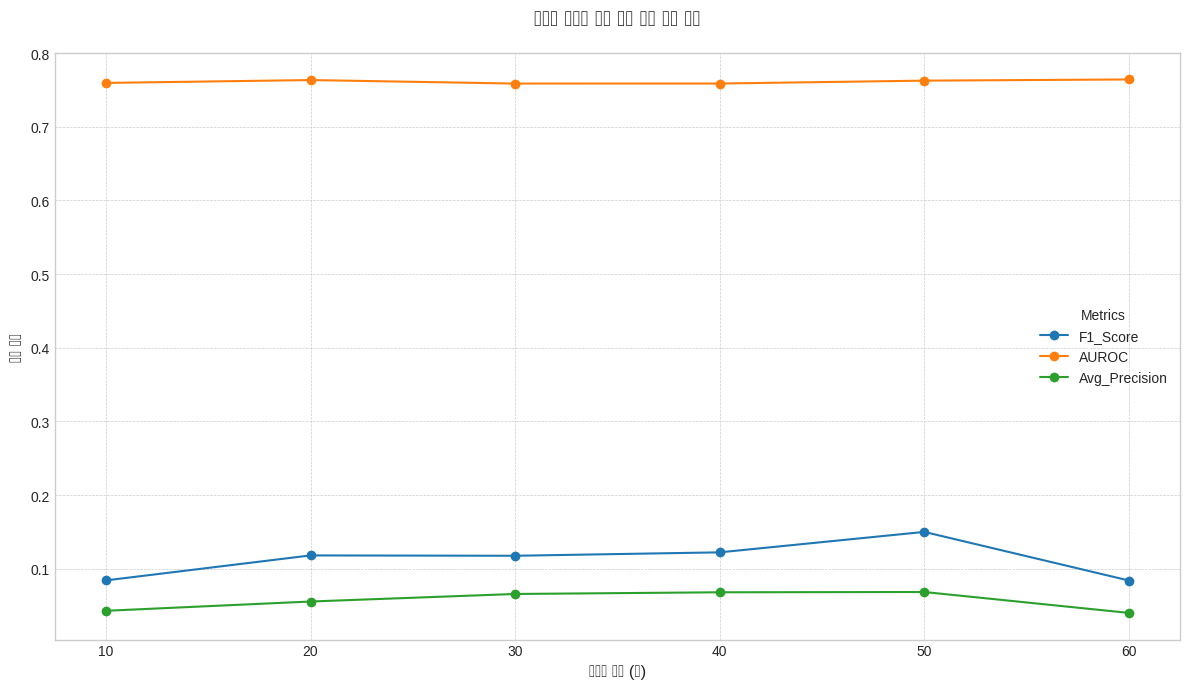

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import (
    make_scorer, f1_score, classification_report, confusion_matrix,
    roc_auc_score, precision_recall_curve, average_precision_score, roc_curve, auc
)
from xgboost import XGBClassifier
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 시각화 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')


# ---------------------------------------------------
# 1. 데이터 및 파라미터 사전 설정 (루프 외부)
# ---------------------------------------------------
# 1-1. 데이터 분할 (전체 데이터셋 대상 1회)
X_all = merged_data.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y_all = merged_data["JDGMNT_WORD_NAME_encoded"]
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

# 1-2. scale_pos_weight 계산 (전체 학습 데이터 대상 1회)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"클래스 가중치 (scale_pos_weight): {scale_pos_weight:.2f}\n")

# 1-3. 결과 취합용 리스트 초기화
results_summary = []
day_intervals = [10, 20, 30, 40, 50, 60]

# ---------------------------------------------------
# 2. 기간별 학습 및 평가 루프
# ---------------------------------------------------
for days in day_intervals:
    print(f"================== 🚀 {days}일 데이터 평가 시작 🚀 ==================")

    # 2-1. 해당 기간 피처 선택
    selected_features = [col for col in X_train.columns if not re.search(r'_\d{2}$', col)]
    temporal_cols_to_keep = []
    for col in X_train.columns:
        match = re.search(r'_(\d{2})$', col)
        if match and int(match.group(1)) < days:
            temporal_cols_to_keep.append(col)
    selected_features.extend(temporal_cols_to_keep)

    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    print(f"사용된 특징 개수: {len(selected_features)}개")

    # --- 단계 1: 하이퍼파라미터 탐색 ---
    xgb_search = XGBClassifier(
        use_label_encoder=False, random_state=42,
        scale_pos_weight=scale_pos_weight, tree_method='gpu_hist', eval_metric='aucpr'
    )
    param_dist = {
        "n_estimators": np.arange(100, 300, 50), "max_depth": np.arange(3, 8, 1),
        "learning_rate": [0.01, 0.05, 0.1, 0.2], "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
    random_search = RandomizedSearchCV(
        estimator=xgb_search, param_distributions=param_dist, n_iter=10,
        scoring=make_scorer(f1_score), cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        verbose=0, random_state=42, n_jobs=-1
    )
    random_search.fit(X_train_subset, y_train)
    best_params = random_search.best_params_

    # --- 단계 2: 최적 파라미터로 모델 재학습 (Early Stopping 적용) ---
    X_train_fit, X_eval, y_train_fit, y_eval = train_test_split(
        X_train_subset, y_train, test_size=0.2, random_state=42, stratify=y_train
    )
    final_model = XGBClassifier(
        **best_params, use_label_encoder=False, random_state=42,
        scale_pos_weight=scale_pos_weight, tree_method='gpu_hist', eval_metric='aucpr',
        # early_stopping_rounds를 생성자에 추가
        early_stopping_rounds=20
    )
    final_model.fit(
        X_train_fit, y_train_fit,
        eval_set=[(X_eval, y_eval)], verbose=False
    )

    # --- 단계 3: 최적 임계값을 적용한 최종 평가 ---
    y_pred_proba = final_model.predict_proba(X_test_subset)[:, 1]

    # F1-Score를 최대화하는 최적 임계값 찾기
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
    # thresholds_pr 배열 길이에 맞게 precision, recall 조정
    f1_scores = (2 * precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
    optimal_idx = np.nanargmax(f1_scores)
    optimal_threshold = thresholds_pr[optimal_idx]

    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
    print(f"F1 Score를 최대화하는 최적 임계값: {optimal_threshold:.4f}")

    # 평가지표 계산 및 저장
    f1_opt = f1_score(y_test, y_pred_optimal)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)
    results_summary.append({
        'days': days, 'F1_Score': f1_opt, 'AUROC': auc_score,
        'Avg_Precision': avg_precision, 'Optimal_Threshold': optimal_threshold
    })

    # --- 단계 4: 종합 시각화 ---
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'[{days}일 데이터] 모델 성능 종합 평가', fontsize=20)

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_optimal)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
                xticklabels=['정상(0)', '부적합(1)'], yticklabels=['정상(0)', '부적합(1)'])
    axes[0, 0].set_title('Confusion Matrix (at Optimal F1 Threshold)', fontsize=14)
    axes[0, 0].set_xlabel('Predicted Label')
    axes[0, 0].set_ylabel('True Label')

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0, 1].set_title('ROC Curve', fontsize=14)
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].legend(loc="lower right")

    # 3. PR Curve
    axes[1, 0].plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
    axes[1, 0].set_title('Precision-Recall Curve', fontsize=14)
    axes[1, 0].set_xlabel('Recall')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend(loc="lower left")

    # 4. 임계치별 성능 변화 그래프 (신규 추가)
    q_rates = [np.mean(y_pred_proba >= t) for t in thresholds_pr]
    axes[1, 1].plot(thresholds_pr, precision[:-1], label='Precision', color='c')
    axes[1, 1].plot(thresholds_pr, recall[:-1], label='Recall', color='m')
    axes[1, 1].plot(thresholds_pr, f1_scores, label='F1 Score', color='g', lw=2)
    axes[1, 1].plot(thresholds_pr, q_rates, label='Q-Rate (Positive Prediction %)', color='y', linestyle=':')
    axes[1, 1].axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
    axes[1, 1].set_title('Metrics vs. Decision Threshold', fontsize=14)
    axes[1, 1].set_xlabel('Threshold')
    axes[1, 1].set_ylabel('Score / Rate')
    axes[1, 1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print(f"\n[{days}일 데이터] Classification Report (Optimal Threshold):\n")
    print(classification_report(y_test, y_pred_optimal, digits=4))
    print("\n\n")


# ---------------------------------------------------
# 3. 최종 결과 종합 및 시각화
# ---------------------------------------------------
final_results_df = pd.DataFrame(results_summary).set_index('days')

print("\n\n================== ✅ 최종 성능 요약 ✅ ==================")
print(final_results_df)

# 성능 추이 시각화
fig, ax = plt.subplots(figsize=(12, 7))
final_results_df[['F1_Score', 'AUROC', 'Avg_Precision']].plot(marker='o', linestyle='-', ax=ax)
ax.set_title('데이터 기간에 따른 모델 성능 변화 추이', fontsize=16, pad=20)
ax.set_xlabel('데이터 기간 (일)', fontsize=12)
ax.set_ylabel('성능 점수', fontsize=12)
ax.legend(title='Metrics')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()##
plt.show()

## F-1 SCORE 기준 50일치가 데이터가 예측력 가장 높음.f-1 score: 0.150154<BR> 50일치 데이터를 가지고 예측성능을 높히기 위한 노력을 해보자.
---
## best params
{'subsample': 0.6, 'n_estimators': np.int64(250), 'max_depth': np.int64(5), 'learning_rate': 0.2, 'colsample_bytree': 0.8}

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 이 코드를 실행하기 전에 'merged_data'가 로드되어 있어야 합니다.

# ---------------------------------------------------
# 1. 기존과 동일한 조건으로 데이터 준비
# ---------------------------------------------------
# 1-1. 데이터 분할
X_all = merged_data.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y_all = merged_data["JDGMNT_WORD_NAME_encoded"]
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

# 1-2. scale_pos_weight 계산
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# ---------------------------------------------------
# 2. 50일치 데이터셋 구성 및 파라미터 탐색
# ---------------------------------------------------
print("================== 🚀 50일 데이터셋 구성 및 파라미터 탐색 ==================\n")

# 2-1. 50일치 피처 선택
selected_features = [col for col in X_train.columns if not re.search(r'_\d{2}$', col)]
temporal_cols_to_keep = []
for col in X_train.columns:
    match = re.search(r'_(\d{2})$', col)
    # 50일 미만 데이터만 선택 (_00 ~ _49)
    if match and int(match.group(1)) < 50:
        temporal_cols_to_keep.append(col)
selected_features.extend(temporal_cols_to_keep)

X_train_subset = X_train[selected_features]
print(f"사용된 특징 개수: {len(selected_features)}개")

# 2-2. RandomizedSearchCV를 실행하여 '최적 파라미터' 찾기
# random_state가 동일하므로 이전과 같은 결과를 얻을 수 있습니다.
xgb_search = XGBClassifier(
    use_label_encoder=False, random_state=42,
    scale_pos_weight=scale_pos_weight, tree_method='gpu_hist', eval_metric='aucpr'
)
param_dist = {
    "n_estimators": np.arange(100, 300, 50), "max_depth": np.arange(3, 8, 1),
    "learning_rate": [0.01, 0.05, 0.1, 0.2], "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    estimator=xgb_search, param_distributions=param_dist, n_iter=10,
    scoring=make_scorer(f1_score), cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=0, random_state=42, n_jobs=-1
)
random_search.fit(X_train_subset, y_train)

# 2-3. 발견된 최적 파라미터와 모델 정보 출력
best_params_50d = random_search.best_params_

print("\n" + "="*60)
print("✅ 50일 데이터 기반 최적 모델 및 파라미터")
print("="*60)
print("🔹 사용된 모델: XGBoost (XGBClassifier)")
print("🔹 최적 하이퍼파라미터:")
print(best_params_50d)
print("="*60)


================== 🚀 50일 데이터셋 구성 및 파라미터 탐색 ==================

사용된 특징 개수: 483개

✅ 50일 데이터 기반 최적 모델 및 파라미터
🔹 사용된 모델: XGBoost (XGBClassifier)
🔹 최적 하이퍼파라미터:
{'subsample': 0.6, 'n_estimators': np.int64(250), 'max_depth': np.int64(5), 'learning_rate': 0.2, 'colsample_bytree': 0.8}


# 특성공학 후 예측성능 확인

In [ ]:
import pandas as pd
import re

# 이 코드를 실행하기 전에 'merged_data' 데이터프레임이 로드되어 있어야 합니다.
# 예시: merged_data = pd.read_csv('your_data.csv')
# merged_data가 이미 로드되어 있다고 가정합니다.

# 1. 사용할 데이터 기간 설정
days_to_keep = 50

# 2. 고정 변수 선택 (컬럼명 끝에 '_숫자2자리' 패턴이 없는 컬럼)
# 타겟 변수는 나중에 포함하므로 우선 모든 피처 컬럼을 대상으로 합니다.
all_feature_cols = merged_data.drop(columns=["JDGMNT_WORD_NAME_encoded"]).columns
static_cols = [col for col in all_feature_cols if not re.search(r'_\d{2}$', col)]

# 3. 50일치 시계열 변수 선택 (0일부터 49일까지)
temporal_cols = []
for col in all_feature_cols:
    match = re.search(r'_(\d{2})$', col)
    # 매치되고, 날짜 숫자가 50보다 작은 경우 (즉, _00 부터 _49 까지)
    if match and int(match.group(1)) < days_to_keep:
        temporal_cols.append(col)

# 4. 최종 사용할 컬럼 리스트 생성 (고정 변수 + 50일치 시계열 변수 + 타겟 변수)
final_cols_to_keep = static_cols + temporal_cols + ['JDGMNT_WORD_NAME_encoded']

# 5. 위 리스트를 사용하여 새로운 데이터프레임 생성
merged_df = merged_data[final_cols_to_keep].copy()

# 6. 결과 확인
print(f"새로운 데이터프레임 'merged_df' 생성이 완료되었습니다.")
print(f" - 데이터 형태 (행, 열): {merged_df.shape}")
print(f" - 포함된 전체 컬럼 수: {len(merged_df.columns)}개")
print("\n'merged_df'에 포함된 컬럼 리스트 (앞 10개만 미리보기):")
print(merged_df.columns.tolist()[:10])


새로운 데이터프레임 'merged_df' 생성이 완료되었습니다.
 - 데이터 형태 (행, 열): (326021, 484)
 - 포함된 전체 컬럼 수: 484개

'merged_df'에 포함된 컬럼 리스트 (앞 10개만 미리보기):
['INSPCT_기타', 'INSPCT_수거검사', 'INSPCT_수입검사', 'INSPCT_압·몰수품검사', 'INSPCT_자가품질위탁검사', 'INSPCT_제조.수입품목허가(신고)용검사', 'PRDLST_건강기능식품(제품)', 'PRDLST_견과 종실류', 'PRDLST_곡류', 'PRDLST_과일류']


In [ ]:
# JDGMNT_WORD_NAME_encoded 값의 분포 확인
value_counts = merged_df['JDGMNT_WORD_NAME_encoded'].value_counts()
proportions = merged_df['JDGMNT_WORD_NAME_encoded'].value_counts(normalize=True)

print("JDGMNT_WORD_NAME_encoded 값 분포:")
print(value_counts)
print("\nJDGMNT_WORD_NAME_encoded 값 비율:")
print(proportions)

JDGMNT_WORD_NAME_encoded 값 분포:
JDGMNT_WORD_NAME_encoded
0    322068
1      3953
Name: count, dtype: int64

JDGMNT_WORD_NAME_encoded 값 비율:
JDGMNT_WORD_NAME_encoded
0    0.987875
1    0.012125
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def create_aflatoxin_features(merged_df, verbose=True):
    """
    아플라톡신 부적합 예측을 위한 간소화된 특성공학
    60일치 데이터 기준, 핵심 특성만 생성

    Parameters:
    -----------
    merged_df : DataFrame
        원본 데이터프레임
    verbose : bool
        상세 정보 출력 여부

    Returns:
    --------
    df : DataFrame
        특성이 추가된 데이터프레임
    feature_info : dict
        추가된 특성 정보
    """
    df = merged_df.copy()

    # 원본 컬럼 저장
    original_columns = set(df.columns)

    # 카테고리별 추가된 특성 추적
    added_features = {
        '핵심 기상 통계': [],
        '위험 조건 지표': [],
        '시계열 패턴': [],
        '복합 위험 지수': []
    }

    # ===== 1. 핵심 기상 통계 (주요 기간만) =====
    print("1. 핵심 기상 통계 생성 중...")

    # 주요 기상 변수만 선택
    weather_vars = {
        'tmprt_150': '평균기온',
        'tmprt_150Top': '최고기온',
        'tmprt_150Lwet': '최저기온',
        'hd_150': '습도',
        'afp': '강수량',
        'solrad_Qy': '일사량',
        'soil_Mitr_10': '토양수분'
    }

    # 핵심 기간만 선택 (7일, 14일, 30일)
    key_windows = [7, 14, 30]

    for var, var_name in weather_vars.items():
        # 00~59까지의 컬럼 찾기
        var_cols = [f'{var}_{i:02d}' for i in range(60) if f'{var}_{i:02d}' in df.columns]

        if var_cols:
            var_data = df[var_cols].values

            for window in key_windows:
                if window <= len(var_cols):
                    window_data = var_data[:, :window]

                    # 평균과 변동성만 계산
                    feature_name = f'{var}_mean_{window}d'
                    df[feature_name] = np.nanmean(window_data, axis=1)
                    added_features['핵심 기상 통계'].append(feature_name)

                    feature_name = f'{var}_std_{window}d'
                    df[feature_name] = np.nanstd(window_data, axis=1)
                    added_features['핵심 기상 통계'].append(feature_name)

    # ===== 2. 위험 조건 지표 =====
    print("2. 위험 조건 지표 생성 중...")

    # 최근 14일 아플라톡신 위험 조건 계산
    risk_days = 0
    for day in range(14):
        temp_col = f'tmprt_150_{day:02d}'
        humid_col = f'hd_150_{day:02d}'

        if temp_col in df.columns and humid_col in df.columns:
            # 고온(25-32°C) + 고습(70-85%) 위험일
            risk_condition = (
                (df[temp_col] >= 25) & (df[temp_col] <= 32) &
                (df[humid_col] >= 70) & (df[humid_col] <= 85)
            )
            risk_days += risk_condition.astype(int)

    feature_name = 'aflatoxin_risk_days_14d'
    df[feature_name] = risk_days
    added_features['위험 조건 지표'].append(feature_name)

    # 극한 기상 일수 (최근 14일)
    if 'tmprt_150Top_mean_14d' in df.columns:
        extreme_temp_cols = [f'tmprt_150Top_{i:02d}' for i in range(14) if f'tmprt_150Top_{i:02d}' in df.columns]
        if extreme_temp_cols:
            extreme_data = df[extreme_temp_cols].values
            feature_name = 'extreme_heat_days_14d'
            df[feature_name] = np.sum(extreme_data > 32, axis=1)  # 32도 초과 일수
            added_features['위험 조건 지표'].append(feature_name)

    if 'hd_150_mean_14d' in df.columns:
        humid_cols = [f'hd_150_{i:02d}' for i in range(14) if f'hd_150_{i:02d}' in df.columns]
        if humid_cols:
            humid_data = df[humid_cols].values
            feature_name = 'high_humid_days_14d'
            df[feature_name] = np.sum(humid_data > 80, axis=1)  # 80% 초과 일수
            added_features['위험 조건 지표'].append(feature_name)

    # 건조 스트레스 지표 (토양수분 기준)
    if 'soil_Mitr_10_mean_7d' in df.columns:
        feature_name = 'drought_stress_index'
        # 토양수분이 평균보다 낮으면 건조 스트레스
        soil_mean = df['soil_Mitr_10_mean_7d'].mean()
        df[feature_name] = (soil_mean - df['soil_Mitr_10_mean_7d']) / (df['soil_Mitr_10_mean_7d'].std() + 1e-10)
        added_features['위험 조건 지표'].append(feature_name)

    # ===== 3. 시계열 패턴 =====
    print("3. 시계열 패턴 특성 생성 중...")

    # 온도와 습도의 7일 트렌드만 계산
    for var in ['tmprt_150', 'hd_150']:
        var_cols = [f'{var}_{i:02d}' for i in range(7) if f'{var}_{i:02d}' in df.columns]

        if len(var_cols) >= 5:
            var_data = df[var_cols].values

            trends = []
            for row in var_data:
                if not np.isnan(row).all():
                    x = np.arange(len(row))
                    valid_mask = ~np.isnan(row)
                    if valid_mask.sum() >= 3:
                        slope, _, _, _, _ = stats.linregress(x[valid_mask], row[valid_mask])
                        trends.append(slope)
                    else:
                        trends.append(0)
                else:
                    trends.append(0)

            feature_name = f'{var}_trend_7d'
            df[feature_name] = trends
            added_features['시계열 패턴'].append(feature_name)

    # 기상 변동성 (최근 7일)
    if 'tmprt_150_std_7d' in df.columns and 'hd_150_std_7d' in df.columns:
        feature_name = 'weather_volatility_7d'
        df[feature_name] = df['tmprt_150_std_7d'] * df['hd_150_std_7d']
        added_features['시계열 패턴'].append(feature_name)

    # ===== 4. 복합 위험 지수 =====
    print("4. 복합 위험 지수 생성 중...")

    # 간단한 아플라톡신 위험 점수
    risk_score = 0
    weights_sum = 0

    # 온도 위험도 (7일 평균)
    if 'tmprt_150_mean_7d' in df.columns:
        temp_risk = ((df['tmprt_150_mean_7d'] - 20) / 15).clip(0, 1)  # 20-35도 범위 정규화
        risk_score += temp_risk * 0.3
        weights_sum += 0.3

    # 습도 위험도 (7일 평균)
    if 'hd_150_mean_7d' in df.columns:
        humid_risk = ((df['hd_150_mean_7d'] - 60) / 25).clip(0, 1)  # 60-85% 범위 정규화
        risk_score += humid_risk * 0.3
        weights_sum += 0.3

    # 위험일 비율
    if 'aflatoxin_risk_days_14d' in df.columns:
        risk_days_ratio = df['aflatoxin_risk_days_14d'] / 14
        risk_score += risk_days_ratio * 0.2
        weights_sum += 0.2

    # 건조 스트레스
    if 'drought_stress_index' in df.columns:
        drought_risk = (df['drought_stress_index'].clip(-2, 2) + 2) / 4  # -2~2 범위를 0~1로 정규화
        risk_score += drought_risk * 0.2
        weights_sum += 0.2

    if weights_sum > 0:
        feature_name = 'aflatoxin_risk_score'
        df[feature_name] = risk_score / weights_sum  # 가중치 정규화
        added_features['복합 위험 지수'].append(feature_name)

    # 위험 레벨 카테고리
    if 'aflatoxin_risk_score' in df.columns:
        feature_name = 'risk_level'
        df[feature_name] = pd.cut(df['aflatoxin_risk_score'],
                                  bins=[0, 0.3, 0.6, 1.0],
                                  labels=[0, 1, 2],  # 0: 낮음, 1: 중간, 2: 높음
                                  include_lowest=True).astype(int)
        added_features['복합 위험 지수'].append(feature_name)

    # ===== 결과 정리 =====
    new_columns = set(df.columns) - original_columns

    print("\n" + "="*80)
    print("특성공학 완료!")
    print("="*80)
    print(f"원본 특성 수: {len(original_columns)}")
    print(f"생성된 전체 특성 수: {len(df.columns)}")
    print(f"추가된 특성 수: {len(new_columns)}")

    if verbose:
        print("\n" + "="*80)
        print("카테고리별 추가된 특성:")
        print("="*80)

        total_added = 0
        for category, features in added_features.items():
            if features:
                print(f"\n[{category}] - {len(features)}개")
                for i, feat in enumerate(features, 1):
                    print(f"  {i:2d}. {feat}")
                total_added += len(features)

        print("\n" + "="*80)
        print(f"총 추가된 특성 수: {total_added}개")
        print("="*80)

    # 특성 정보 딕셔너리 생성
    feature_info = {
        'original_features': list(original_columns),
        'new_features': list(new_columns),
        'features_by_category': added_features,
        'total_original': len(original_columns),
        'total_new': len(new_columns),
        'total_final': len(df.columns)
    }

    return df, feature_info

def get_feature_summary(feature_info):
    """
    추가된 특성의 요약 정보 출력
    """
    print("\n" + "="*80)
    print("특성 요약")
    print("="*80)

    summary = []
    for category, features in feature_info['features_by_category'].items():
        summary.append({
            'Category': category,
            'Count': len(features),
            'Features': ', '.join(features[:3]) + ('...' if len(features) > 3 else '')
        })

    summary_df = pd.DataFrame(summary)
    print(summary_df.to_string(index=False))

    return summary_df

# 사용 예시
if __name__ == "__main__":
    # 특성 생성
    df_enhanced, feature_info = create_aflatoxin_features(merged_df, verbose=True)

    # 요약 정보 확인
    summary = get_feature_summary(feature_info)

    # 선택적: CSV로 저장
    # features_df = pd.DataFrame([
    #     {'category': cat, 'feature_name': feat}
    #     for cat, feats in feature_info['features_by_category'].items()
    #     for feat in feats
    # ])
    # features_df.to_csv('aflatoxin_features_simple.csv', index=False, encoding='utf-8-sig')

1. 핵심 기상 통계 생성 중...
2. 위험 조건 지표 생성 중...
3. 시계열 패턴 특성 생성 중...
4. 복합 위험 지수 생성 중...

특성공학 완료!
원본 특성 수: 484
생성된 전체 특성 수: 535
추가된 특성 수: 51

카테고리별 추가된 특성:

[핵심 기상 통계] - 42개
   1. tmprt_150_mean_7d
   2. tmprt_150_std_7d
   3. tmprt_150_mean_14d
   4. tmprt_150_std_14d
   5. tmprt_150_mean_30d
   6. tmprt_150_std_30d
   7. tmprt_150Top_mean_7d
   8. tmprt_150Top_std_7d
   9. tmprt_150Top_mean_14d
  10. tmprt_150Top_std_14d
  11. tmprt_150Top_mean_30d
  12. tmprt_150Top_std_30d
  13. tmprt_150Lwet_mean_7d
  14. tmprt_150Lwet_std_7d
  15. tmprt_150Lwet_mean_14d
  16. tmprt_150Lwet_std_14d
  17. tmprt_150Lwet_mean_30d
  18. tmprt_150Lwet_std_30d
  19. hd_150_mean_7d
  20. hd_150_std_7d
  21. hd_150_mean_14d
  22. hd_150_std_14d
  23. hd_150_mean_30d
  24. hd_150_std_30d
  25. afp_mean_7d
  26. afp_std_7d
  27. afp_mean_14d
  28. afp_std_14d
  29. afp_mean_30d
  30. afp_std_30d
  31. solrad_Qy_mean_7d
  32. solrad_Qy_std_7d
  33. solrad_Qy_mean_14d
  34. solrad_Qy_std_14d
  35. solrad_Qy_mean_30d

## 1. 핵심 기상 통계 (51개) 📊
이 변수들은 주요 기상 요소(온도, 습도 등)의 특정 기간(7일, 14일, 30일) 동안의 통계적 특징을 나타냅니다. 변수 이름은 [기상요소]_[통계치]_[기간] 형식으로 구성되어 있습니다.
### 예시)
tmprt_150_mean_7d: 최근 7일간의 평균 기온의 평균값을 의미합니다

## 2. 위험 조건 지표 (4개) ⚠️
아플라톡신 발생에 직접적인 영향을 주는 특정 위험 조건이 얼마나 자주 발생했는지를 나타내는 지표입니다.
### 예시)
aflatoxin_risk_days_14d: 최근 14일 중 아플라톡신이 증식하기 좋은 위험 조건(기온: 25-32℃, 습도: 70-85%)에 해당했던 날의 수입니다. 이 값이 높을수록 위험이 컸음을 의미합니다.

## 3. 시계열 패턴 (3개) 📈
최근 단기간 동안의 기상 데이터 변화 추세를 나타내는 지표입니다.
### 예시)
tmprt_150_trend_7d: 최근 7일간의 **평균 기온 변화 추세(기울기)**입니다. 양수(+)면 기온이 상승 추세, 음수(-)면 하강 추세임을 의미합니다.

## 4. 복합 위험 지수 (2개) 💯
위에서 만든 여러 지표들을 종합하여 아플라톡신 발생 위험도를 점수와 등급으로 표현한 최종 지표입니다.
### 예시)
aflatoxin_risk_score: 온도, 습도, 위험일수, 가뭄 스트레스 등 여러 위험 요인을 종합하여 계산한 위험 점수입니다. 0~1 사이의 값을 가지며, 1에 가까울수록 위험도가 높다는 것을 의미합니다.

In [ ]:
import pandas as pd

# Load the enhanced dataframe
df_enhanced = pd.read_pickle("/content/drive/MyDrive/특성공학완료.pkl.gz", compression='gzip')

# Display the first few rows to confirm
display(df_enhanced.head())

,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,PRDLST_과일류,...,soil_Mitr_10_std_30d,aflatoxin_risk_days_14d,extreme_heat_days_14d,high_humid_days_14d,drought_stress_index,tmprt_150_trend_7d,hd_150_trend_7d,weather_volatility_7d,aflatoxin_risk_score,risk_level
0,False,False,False,False,True,False,False,False,False,False,...,2.206105,0,1,2,-0.730218,-0.546429,-1.621429,31.906418,0.173203,0
1,False,False,False,False,True,False,False,False,False,False,...,2.206105,0,1,2,-0.730218,-0.546429,-1.621429,31.906418,0.173203,0
2,False,False,False,False,True,False,False,False,False,False,...,0.000000,0,0,0,1.212965,1.189286,2.325000,34.144843,0.188591,0
3,False,False,False,False,True,False,True,False,False,False,...,0.000000,0,0,2,1.212965,-0.657143,-2.021429,13.611028,0.292305,0
4,False,False,False,False,True,False,True,False,False,False,...,0.000000,0,0,2,1.212965,-0.657143,-2.021429,13.611028,0.292305,0


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

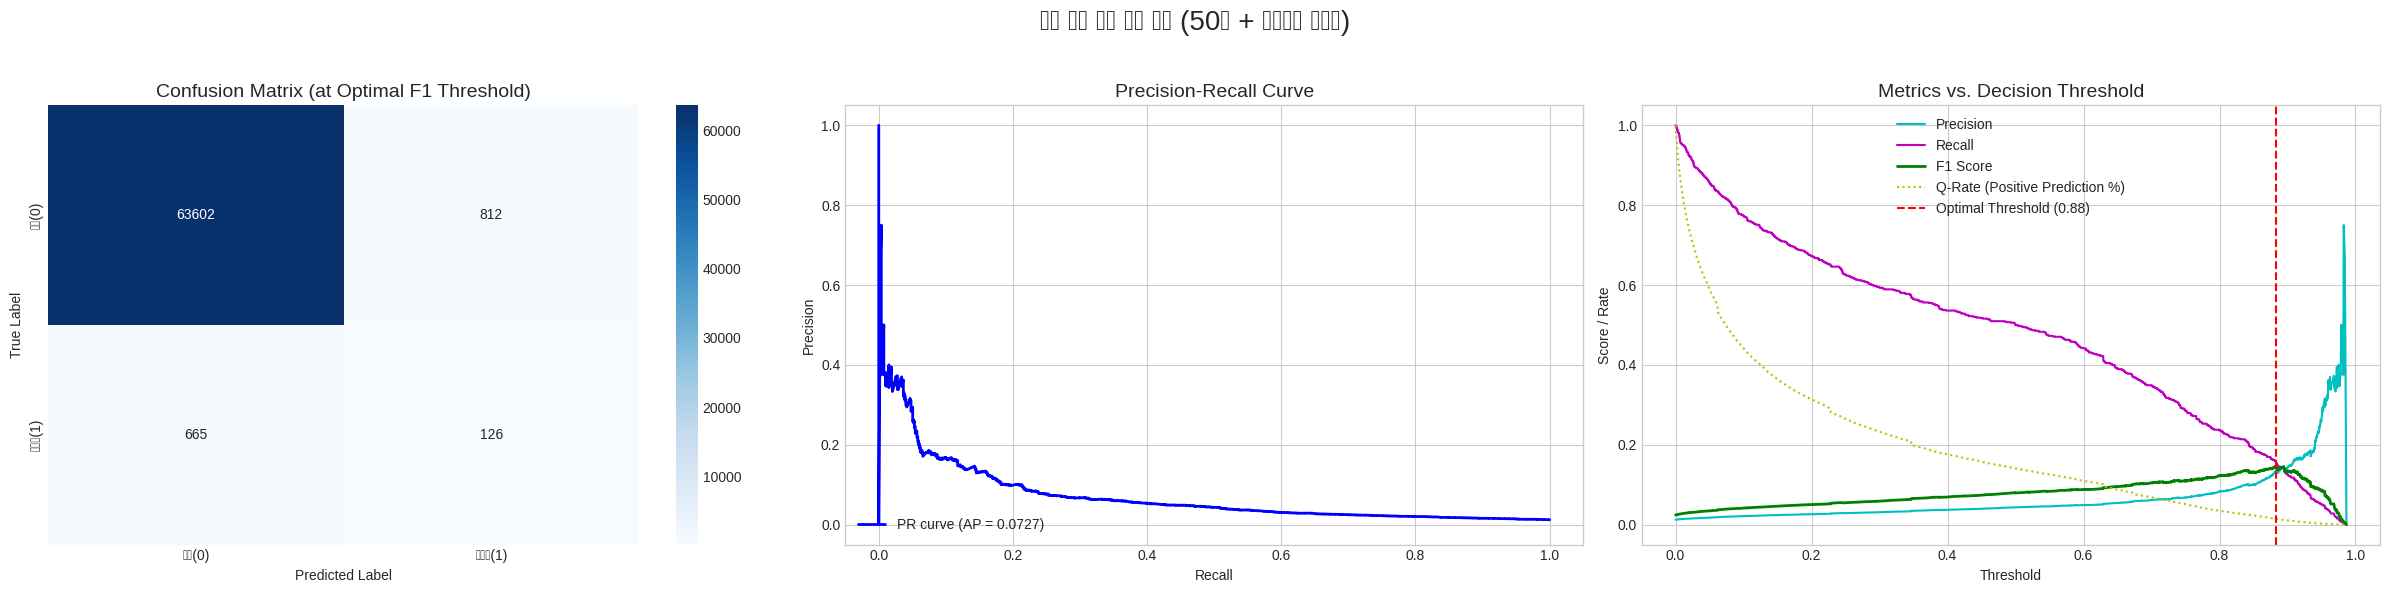

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_recall_curve, average_precision_score, roc_curve, auc
)
from xgboost import XGBClassifier
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 시각화 한글 폰트 설정
!sudo apt-get install -y fonts-nanum -qq
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')


# ---------------------------------------------------
# 1. 데이터 준비 (df_enhanced 사용)
# ---------------------------------------------------
# 1-1. 데이터 분할 (전체 데이터셋 대상 1회)
# 'df_enhanced' 데이터프레임이 로드되어 있다고 가정합니다.
X_all = df_enhanced.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y_all = df_enhanced["JDGMNT_WORD_NAME_encoded"]
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

# 1-2. scale_pos_weight 계산 (전체 학습 데이터 대상 1회)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"클래스 가중치 (scale_pos_weight): {scale_pos_weight:.2f}\n")

# 1-3. 고정 하이퍼파라미터 정의
best_params_50d = {
    'subsample': 0.6,
    'n_estimators': 250,
    'max_depth': 5,
    'learning_rate': 0.2,
    'colsample_bytree': 0.8
}
print("="*60)
print("✅ 고정된 하이퍼파라미터를 사용하여 모델을 학습합니다.")
print("="*60)
print("🔹 사용된 모델: XGBoost (XGBClassifier)")
print("🔹 적용된 하이퍼파라미터:")
print(best_params_50d)
print("="*60)


# ---------------------------------------------------
# 2. 최종 모델 학습 및 평가
# ---------------------------------------------------
# 2-1. 최종 모델 생성
final_model_50d = XGBClassifier(
    **best_params_50d,  # 제공된 고정 파라미터를 그대로 적용
    early_stopping_rounds=20,
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    tree_method='gpu_hist',
    eval_metric='aucpr'
)

# 2-2. Early stopping을 위한 학습/검증 데이터 분리
# df_enhanced에는 50일치 데이터와 파생변수만 포함되어 있다고 가정하므로,
# 별도의 피처 선택 과정 없이 바로 사용합니다.
X_train_fit, X_eval, y_train_fit, y_eval = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 2-3. 모델 학습
final_model_50d.fit(X_train_fit, y_train_fit,
                    eval_set=[(X_eval, y_eval)],
                    verbose=False)

print("\n최종 모델이 'final_model_50d' 변수에 생성되었습니다.")
print(final_model_50d)


# ---------------------------------------------------
# 3. 최종 모델 성능 평가 및 시각화
# ---------------------------------------------------
print("\n" + "="*60)
print("✅ 최종 모델 성능 평가 및 시각화")
print("="*60)

# 3-1. 예측 확률 계산
y_pred_proba = final_model_50d.predict_proba(X_test)[:, 1]

# 3-2. F1-Score를 최대화하는 최적 임계값 찾기
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
# np.nan을 처리하기 위해 0으로 대체
f1_scores = np.nan_to_num((2 * precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]))
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]
print(f"\nF1 Score를 최대화하는 최적 임계값: {optimal_threshold:.4f}\n")

# 3-3. 최적 임계값으로 최종 예측 생성
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# 3-4. Classification Report (Precision, Recall, F1-score) 출력
print("--- Classification Report (최적 임계값 기준) ---")
print(classification_report(y_test, y_pred_optimal, digits=4))

# 3-5. 종합 시각화 (Confusion Matrix, PR Curve, Thresholds plot)
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle('최종 모델 성능 종합 평가 (50일 + 파생변수 데이터)', fontsize=20)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['정상(0)', '부적합(1)'], yticklabels=['정상(0)', '부적합(1)'])
axes[0].set_title('Confusion Matrix (at Optimal F1 Threshold)', fontsize=14)
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# PR Curve
avg_precision = average_precision_score(y_test, y_pred_proba)
axes[1].plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
axes[1].set_title('Precision-Recall Curve', fontsize=14)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc="lower left")

# Metrics vs. Decision Threshold
q_rates = [np.mean(y_pred_proba >= t) for t in thresholds_pr]
axes[2].plot(thresholds_pr, precision[:-1], label='Precision', color='c')
axes[2].plot(thresholds_pr, recall[:-1], label='Recall', color='m')
axes[2].plot(thresholds_pr, f1_scores, label='F1 Score', color='g', lw=2)
axes[2].plot(thresholds_pr, q_rates, label='Q-Rate (Positive Prediction %)', color='y', linestyle=':')
axes[2].axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
axes[2].set_title('Metrics vs. Decision Threshold', fontsize=14)
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Score / Rate')
axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## f-1 score: 0.150154 ->0.1457 성능 떨어짐.
---
## 모든 조합 16개 경우의 수에서 최고성능 찾기

In [ ]:
from itertools import combinations

# ---------------------------------------------------
# A. 4개 변수 그룹 정의
# ---------------------------------------------------
core_weather_stats = [
    "tmprt_150_mean_7d", "tmprt_150_std_7d",
    "tmprt_150_mean_14d", "tmprt_150_std_14d",
    "tmprt_150_mean_30d", "tmprt_150_std_30d",
    "tmprt_150Top_mean_7d", "tmprt_150Top_std_7d",
    "tmprt_150Top_mean_14d", "tmprt_150Top_std_14d",
    "tmprt_150Top_mean_30d", "tmprt_150Top_std_30d",
    "tmprt_150Lwet_mean_7d", "tmprt_150Lwet_std_7d",
    "tmprt_150Lwet_mean_14d", "tmprt_150Lwet_std_14d",
    "tmprt_150Lwet_mean_30d", "tmprt_150Lwet_std_30d",
    "hd_150_mean_7d", "hd_150_std_7d",
    "hd_150_mean_14d", "hd_150_std_14d",
    "hd_150_mean_30d", "hd_150_std_30d",
    "afp_mean_7d", "afp_std_7d",
    "afp_mean_14d", "afp_std_14d",
    "afp_mean_30d", "afp_std_30d",
    "solrad_Qy_mean_7d", "solrad_Qy_std_7d",
    "solrad_Qy_mean_14d", "solrad_Qy_std_14d",
    "solrad_Qy_mean_30d", "solrad_Qy_std_30d",
    "soil_Mitr_10_mean_7d", "soil_Mitr_10_std_7d",
    "soil_Mitr_10_mean_14d", "soil_Mitr_10_std_14d",
    "soil_Mitr_10_mean_30d", "soil_Mitr_10_std_30d"
]

risk_indicators = [
    "aflatoxin_risk_days_14d",
    "extreme_heat_days_14d",
    "high_humid_days_14d",
    "drought_stress_index"
]

time_series_patterns = [
    "tmprt_150_trend_7d",
    "hd_150_trend_7d",
    "weather_volatility_7d"
]

composite_risk_index = [
    "aflatoxin_risk_score",
    "risk_level"
]

group_dict = {
    "core_weather_stats": core_weather_stats,
    "risk_indicators": risk_indicators,
    "time_series_patterns": time_series_patterns,
    "composite_risk_index": composite_risk_index
}

# ---------------------------------------------------
# B. 15가지 조합 생성
# ---------------------------------------------------
all_group_names = list(group_dict.keys())
all_combinations = []
for r in range(1, len(all_group_names) + 1):
    for combo in combinations(all_group_names, r):
        all_combinations.append(combo)

print(f"총 조합 수: {len(all_combinations)} (공집합 제외)")

# ---------------------------------------------------
# C. 조합별 모델 학습 및 성능 저장
# ---------------------------------------------------
results = []

for combo in all_combinations:
    # 1) df 복사
    X_all = df_enhanced.copy()

    # 2) 조합 외의 그룹 변수는 drop
    drop_vars = []
    for group_name, group_vars in group_dict.items():
        if group_name not in combo:
            drop_vars.extend(group_vars)

    # 기존 y 제거 + 선택 안 된 변수 제거
    X_all = X_all.drop(columns=["JDGMNT_WORD_NAME_encoded"] + drop_vars)
    y_all = df_enhanced["JDGMNT_WORD_NAME_encoded"]

    # 3) 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
    )
    X_train_fit, X_eval, y_train_fit, y_eval = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

    # 4) 클래스 불균형 가중치 계산
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

    # 5) 모델 생성
    model = XGBClassifier(
        **best_params_50d,
        early_stopping_rounds=20,
        use_label_encoder=False,
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        tree_method='gpu_hist',
        eval_metric='aucpr'
    )

    # 6) 학습
    model.fit(X_train_fit, y_train_fit,
              eval_set=[(X_eval, y_eval)],
              verbose=False)

    # 7) 평가
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = np.nan_to_num((2 * precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]))
    best_f1 = f1_scores.max()

    results.append({
        "조합": "+".join(combo),
        "F1 Score": best_f1
    })

# ---------------------------------------------------
# D. 조합별 성능 비교
# ---------------------------------------------------
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("\n=== 조합별 성능 비교 (F1 Score 기준) ===")
print(results_df)


총 조합 수: 15 (공집합 제외)

=== 조합별 성능 비교 (F1 Score 기준) ===
                                                   조합  F1 Score
14  core_weather_stats+risk_indicators+time_series...  0.145749
11  core_weather_stats+risk_indicators+composite_r...  0.136178
8                risk_indicators+composite_risk_index  0.133477
1                                     risk_indicators  0.127168
3                                composite_risk_index  0.124444
4                  core_weather_stats+risk_indicators  0.124254
6             core_weather_stats+composite_risk_index  0.122156
0                                  core_weather_stats  0.121470
10  core_weather_stats+risk_indicators+time_series...  0.119252
5             core_weather_stats+time_series_patterns  0.116279
12  core_weather_stats+time_series_patterns+compos...  0.115263
7                risk_indicators+time_series_patterns  0.112760
13  risk_indicators+time_series_patterns+composite...  0.102309
2                                time_series_patter

## 결론: 특성공학하면 성능이 더 떨어짐.
---
## 특성공학으로 성능이 올랐던 떄는, SMOTE적용+결과값을 활용한 부적합율 조정을 선행한 경우임.
---
## smote적용해보자

In [ ]:
df_enhanced.shape

(326021, 535)

In [ ]:
merged_data=df_enhanced

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN

# ---------------------------
# 1. 데이터 준비
# ---------------------------
X = merged_data.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y = merged_data["JDGMNT_WORD_NAME_encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 2. 사용할 SMOTE 기법 정의
# ---------------------------
smote_methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
}

# ---------------------------
# 3. 최적 파라미터 XGBoost 설정
# ---------------------------
best_params = {
    'subsample': 0.6,
    'n_estimators': 250,
    'max_depth': 5,
    'learning_rate': 0.2,
    'colsample_bytree': 0.8
}

# scale_pos_weight는 SMOTE 이후 필요 없음
model = XGBClassifier(
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    **best_params
)

# ---------------------------
# 4. 반복문으로 SMOTE 기법 비교
# ---------------------------
results = {}

for name, smote in smote_methods.items():
    print(f"\n=== {name} 적용 ===")

    # 데이터 오버샘플링
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # 모델 학습
    model.fit(X_resampled, y_resampled)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    print(f"F1-score: {f1:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

    results[name] = f1

# ---------------------------
# 5. 최종 결과 정리
# ---------------------------
best_method = max(results, key=results.get)
print("\n==============================")
print("최고 성능 SMOTE 기법:", best_method)
print("해당 기법의 F1-score:", results[best_method])
print("==============================")



=== SMOTE 적용 ===
F1-score: 0.1190
              precision    recall  f1-score   support

           0     0.9900    0.9740    0.9819     64414
           1     0.0852    0.1972    0.1190       791

    accuracy                         0.9646     65205
   macro avg     0.5376    0.5856    0.5505     65205
weighted avg     0.9790    0.9646    0.9715     65205


=== ADASYN 적용 ===
F1-score: 0.1248
              precision    recall  f1-score   support

           0     0.9900    0.9759    0.9829     64414
           1     0.0913    0.1972    0.1248       791

    accuracy                         0.9664     65205
   macro avg     0.5406    0.5866    0.5538     65205
weighted avg     0.9791    0.9664    0.9725     65205


최고 성능 SMOTE 기법: ADASYN
해당 기법의 F1-score: 0.1248


## 이번엔 특성 공학 안한 데이터에 smote

In [ ]:
import pandas as pd

merged_data= pd.read_pickle("/content/drive/MyDrive/merged_data.pkl", compression='gzip')
merged_data

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,...,tmprt_150_50,tmprt_150_51,tmprt_150_52,tmprt_150_53,tmprt_150_54,tmprt_150_55,tmprt_150_56,tmprt_150_57,tmprt_150_58,tmprt_150_59
0,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
1,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
2,0,False,False,False,False,True,False,False,False,False,...,13.9,13.9,12.8,12.4,12.8,11.2,10.4,14.3,14.2,12.7
3,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
4,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337244,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337245,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337246,0,False,False,False,True,False,False,False,False,False,...,14.4,16.9,15.2,18.3,18.1,15.9,16.4,15.0,14.9,15.7


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN

# ---------------------------
# 1. 데이터 준비
# ---------------------------
X = merged_data.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y = merged_data["JDGMNT_WORD_NAME_encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 2. 사용할 SMOTE 기법 정의
# ---------------------------
smote_methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
}

# ---------------------------
# 3. 최적 파라미터 XGBoost 설정
# ---------------------------
best_params = {
    'subsample': 0.6,
    'n_estimators': 250,
    'max_depth': 5,
    'learning_rate': 0.2,
    'colsample_bytree': 0.8
}

# scale_pos_weight는 SMOTE 이후 필요 없음
model = XGBClassifier(
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    **best_params
)

# ---------------------------
# 4. 반복문으로 SMOTE 기법 비교
# ---------------------------
results = {}

for name, smote in smote_methods.items():
    print(f"\n=== {name} 적용 ===")

    # 데이터 오버샘플링
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # 모델 학습
    model.fit(X_resampled, y_resampled)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    print(f"F1-score: {f1:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

    results[name] = f1

# ---------------------------
# 5. 최종 결과 정리
# ---------------------------
best_method = max(results, key=results.get)
print("\n==============================")
print("최고 성능 SMOTE 기법:", best_method)
print("해당 기법의 F1-score:", results[best_method])
print("==============================")



=== SMOTE 적용 ===
F1-score: 0.1212
              precision    recall  f1-score   support

           0     0.9900    0.9742    0.9821     64414
           1     0.0870    0.1997    0.1212       791

    accuracy                         0.9648     65205
   macro avg     0.5385    0.5870    0.5516     65205
weighted avg     0.9791    0.9648    0.9716     65205


=== ADASYN 적용 ===
F1-score: 0.1237
              precision    recall  f1-score   support

           0     0.9900    0.9763    0.9831     64414
           1     0.0910    0.1934    0.1237       791

    accuracy                         0.9668     65205
   macro avg     0.5405    0.5848    0.5534     65205
weighted avg     0.9791    0.9668    0.9726     65205


최고 성능 SMOTE 기법: ADASYN
해당 기법의 F1-score: 0.12373635260816822


#PCA 해보자(숫자형은 환경데이터 밖에 없음)
1. 50일치 데이터 전체 pca
2. 50일치 섹션별(검사유형, 식품유형, 기후환경) pca.
3. 원본 데이터 전체 pca
4. 점수높은 항목에 대한 somte 적용하여 예측

# 1. 50일치 데이터 전체
---
### 95% 설명력을 갖는 주성분 활용

In [ ]:
import pandas as pd

merged_data= pd.read_pickle("/content/drive/MyDrive/merged_data.pkl", compression='gzip')
merged_data

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,...,tmprt_150_50,tmprt_150_51,tmprt_150_52,tmprt_150_53,tmprt_150_54,tmprt_150_55,tmprt_150_56,tmprt_150_57,tmprt_150_58,tmprt_150_59
0,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
1,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
2,0,False,False,False,False,True,False,False,False,False,...,13.9,13.9,12.8,12.4,12.8,11.2,10.4,14.3,14.2,12.7
3,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
4,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337244,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337245,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337246,0,False,False,False,True,False,False,False,False,False,...,14.4,16.9,15.2,18.3,18.1,15.9,16.4,15.0,14.9,15.7


In [ ]:
import re

# ---------------------------------------------------
# 1. 50일치 데이터셋 구성
# ---------------------------------------------------
print("================== 🚀 merged_data → 50일치 데이터셋 생성 ==================\n")

# 1-1. 고정 변수 추출 (뒤에 _숫자 형식이 없는 컬럼들)
fixed_features = [col for col in merged_data.columns if not re.search(r'_\d{2}$', col)]

# 1-2. 50일치 시계열 변수 추출 (_00 ~ _49)
temporal_features = []
for col in merged_data.columns:
    match = re.search(r'_(\d{2})$', col)
    if match and int(match.group(1)) < 50:   # 50일 미만
        temporal_features.append(col)

# 1-3. 최종 선택된 컬럼 (고정 변수 + 50일치 변수)
selected_features = fixed_features + temporal_features

# 1-4. 새로운 데이터셋 생성
merged_data_50 = merged_data[selected_features].copy()
print(f"📊 50일치 데이터셋 컬럼 수: {len(selected_features)}개")
print(f"📂 50_merged_data shape: {merged_data_50.shape}")


================== 🚀 merged_data → 50일치 데이터셋 생성 ==================

📊 50일치 데이터셋 컬럼 수: 484개
📂 50_merged_data shape: (326021, 484)


In [ ]:
# merged_data_50의 데이터 타입별 컬럼 수 확인
dtype_counts = merged_data_50.dtypes.value_counts()
print("merged_data_50 데이터 타입별 컬럼 수:")
print(dtype_counts)

merged_data_50 데이터 타입별 컬럼 수:
float64    450
bool        33
int64        1
Name: count, dtype: int64


전체 분산의 95%를 설명하는 데 필요한 주성분 개수: 124개
숫자형 변수 PCA 완료: 450개 → 124개 주성분

불리언 변수(33개)와 PCA 결과(124개) 결합 완료.
최종 피처 데이터 형태: (326021, 157)

클래스 가중치 (scale_pos_pos_weight): 81.48

================== 🚀 XGBoost 모델 학습 시작 (PCA + Bool 변수) 🚀 ==================


XGBoost 모델 학습 완료.

================== ✅ 최종 모델 성능 평가 및 시각화 ✅ ==================

F1 Score를 최대화하는 최적 임계값: 0.8371

--- Classification Report (최적 임계값 기준) ---
              precision    recall  f1-score   support

           0     0.9904    0.9767    0.9835     64414
           1     0.1071    0.2276    0.1456       791

    accuracy                         0.9676     65205
   macro avg     0.5487    0.6021    0.5646     65205
weighted avg     0.9797    0.9676    0.9733     65205



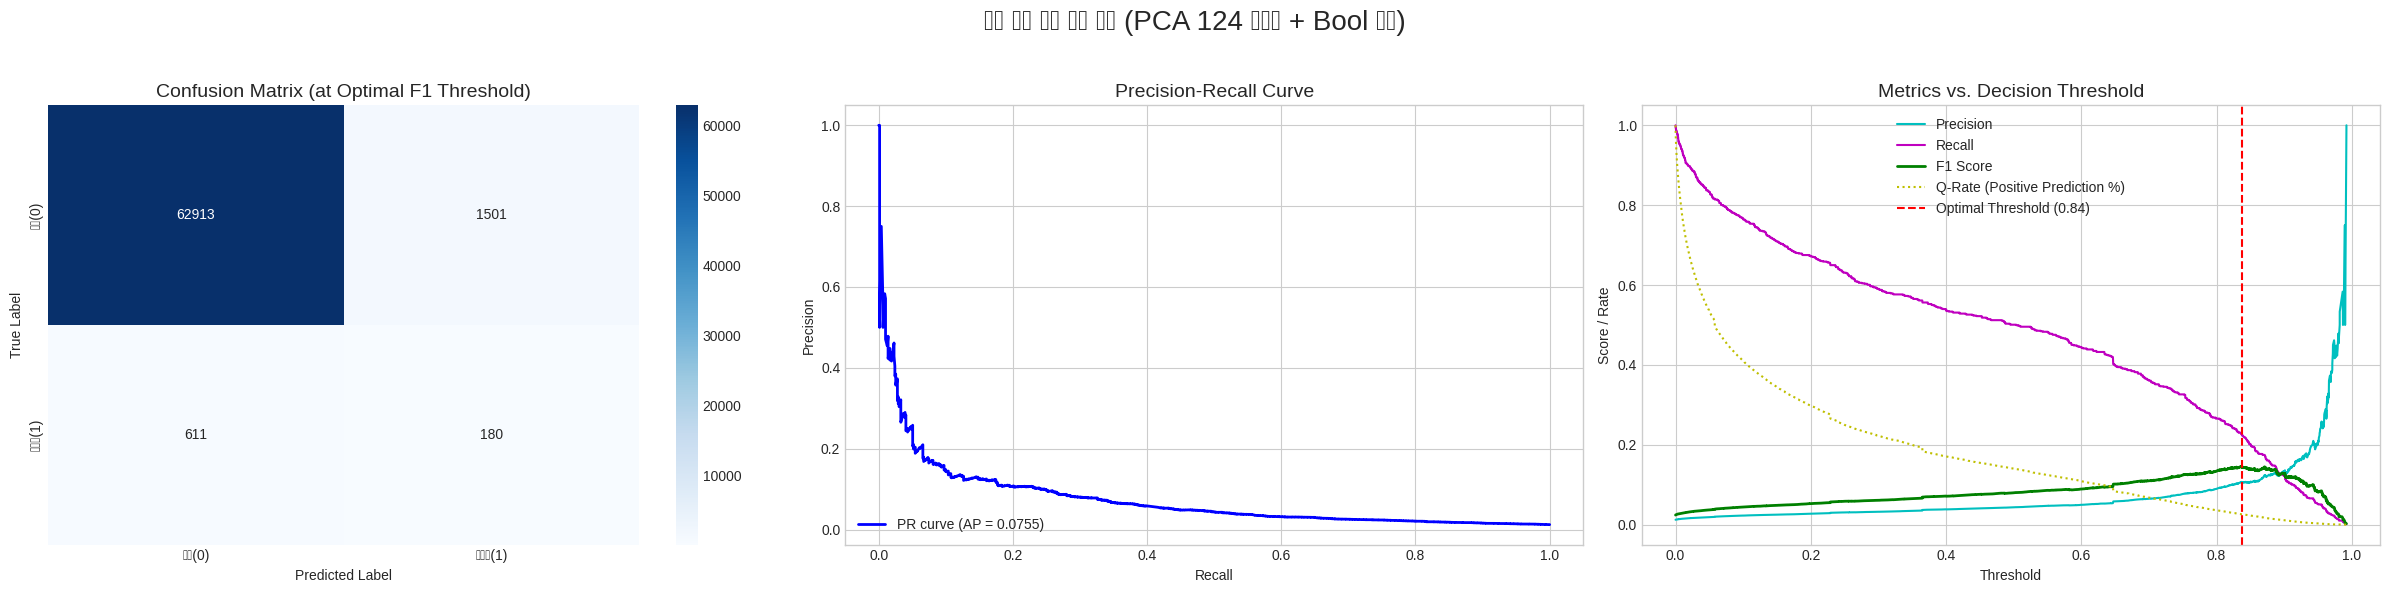

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, precision_recall_curve, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 시각화 한글 폰트 설정 (이전 실행에서 이미 설정되었다고 가정)
# !sudo apt-get install -y fonts-nanum -qq
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')


# ---------------------------------------------------
# 1. 데이터 준비
# ---------------------------------------------------
# merged_data가 이미 로드되어 있다고 가정합니다.

# 타겟 변수와 피처 분리
X_all = merged_data_50.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y_all = merged_data_50["JDGMNT_WORD_NAME_encoded"]

# 숫자형 변수와 불리언 변수 분리
X_num = X_all.select_dtypes(include=np.number).copy()
X_bool = X_all.select_dtypes(include='bool').copy()


# ---------------------------------------------------
# 2. 숫자형 변수에 PCA 적용
# ---------------------------------------------------
# 스케일링
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# PCA 수행 (분산의 95%를 설명하는 주성분 개수 사용)
# n_components를 None으로 설정하여 분산 설명력 확인 후 95% 기준 선택
pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_num_scaled)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"전체 분산의 95%를 설명하는 데 필요한 주성분 개수: {n_components_95}개")

# 최종 PCA 모델 생성 및 변환
pca = PCA(n_components=n_components_95, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)

# PCA 결과 DataFrame 생성
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_95)])

print(f"숫자형 변수 PCA 완료: {X_num.shape[1]}개 → {n_components_95}개 주성분\n")


# ---------------------------------------------------
# 3. 불리언 변수와 PCA 결과 결합
# ---------------------------------------------------
# 인덱스 재설정 (merged_data의 인덱스를 따라가도록)
X_bool.index = X_all.index
X_pca_df.index = X_all.index

# 불리언 변수와 PCA 결과 결합
X_processed = pd.concat([X_bool, X_pca_df], axis=1)

print(f"불리언 변수({X_bool.shape[1]}개)와 PCA 결과({X_pca_df.shape[1]}개) 결합 완료.")
print(f"최종 피처 데이터 형태: {X_processed.shape}\n")


# ---------------------------------------------------
# 4. 데이터 분할
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_all, test_size=0.2, random_state=42, stratify=y_all
)

# 클래스 가중치 계산
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"클래스 가중치 (scale_pos_pos_weight): {scale_pos_weight:.2f}\n")


# ---------------------------------------------------
# 5. XGBoost 모델 학습 및 평가
# ---------------------------------------------------
print("================== 🚀 XGBoost 모델 학습 시작 (PCA + Bool 변수) 🚀 ==================\n")

# 모델 파라미터 설정
best_params = {
    'subsample': 0.6,
    'n_estimators': 250,
    'max_depth': 5,
    'learning_rate': 0.2,
    'colsample_bytree': 0.8
}

model = XGBClassifier(
    **best_params,
    eval_metric="logloss", # 또는 aucpr
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight # 불균형 가중치 적용
)

# Early stopping을 위한 학습/검증 데이터 분리
X_train_fit, X_eval, y_train_fit, y_eval = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 모델 학습 (Early stopping 적용 방식 수정)
model.fit(X_train_fit, y_train_fit,
          eval_set=[(X_eval, y_eval)],
          verbose=False) # early_stopping_rounds를 fit 메서드 호출 시 인자로 전달


print("\nXGBoost 모델 학습 완료.\n")


# ---------------------------------------------------
# 6. 최종 성능 평가 및 시각화
# ---------------------------------------------------
print("================== ✅ 최종 모델 성능 평가 및 시각화 ✅ ==================\n")

# 예측 확률 계산
y_pred_proba = model.predict_proba(X_test)[:, 1]

# F1-Score를 최대화하는 최적 임계값 찾기
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
# np.nan을 처리하기 위해 0으로 대체
f1_scores = np.nan_to_num((2 * precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]))
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]
print(f"F1 Score를 최대화하는 최적 임계값: {optimal_threshold:.4f}\n")

# 최적 임계값으로 최종 예측 생성
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Classification Report (Precision, Recall, F1-score) 출력
print("--- Classification Report (최적 임계값 기준) ---")
print(classification_report(y_test, y_pred_optimal, digits=4))

# 종합 시각화 (Confusion Matrix, PR Curve, Thresholds plot)
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle(f'최종 모델 성능 종합 평가 (PCA {n_components_95} 주성분 + Bool 변수)', fontsize=20)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['정상(0)', '부적합(1)'], yticklabels=['정상(0)', '부적합(1)'])
axes[0].set_title('Confusion Matrix (at Optimal F1 Threshold)', fontsize=14)
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# PR Curve
avg_precision = average_precision_score(y_test, y_pred_proba)
axes[1].plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
axes[1].set_title('Precision-Recall Curve', fontsize=14)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc="lower left")

# Metrics vs. Decision Threshold
q_rates = [np.mean(y_pred_proba >= t) for t in thresholds_pr]
axes[2].plot(thresholds_pr, precision[:-1], label='Precision', color='c')
axes[2].plot(thresholds_pr, recall[:-1], label='Recall', color='m')
axes[2].plot(thresholds_pr, f1_scores, label='F1 Score', color='g', lw=2)
axes[2].plot(thresholds_pr, q_rates, label='Q-Rate (Positive Prediction %)', color='y', linestyle=':')
axes[2].axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
axes[2].set_title('Metrics vs. Decision Threshold', fontsize=14)
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Score / Rate')
axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2. 섹션별(검사유형, 식품유형, 기후환경) PCA.
---
### 각 섹터별(기온, 습도 등) 50일치 시계열 변수에 PCA를 적용해 첫 번째 주성분(1PC)만 추출하여 새로운 단일 변수로 추가한다

In [ ]:
import pandas as pd

merged_data= pd.read_pickle("/content/drive/MyDrive/merged_data.pkl", compression='gzip')
merged_data

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,...,tmprt_150_50,tmprt_150_51,tmprt_150_52,tmprt_150_53,tmprt_150_54,tmprt_150_55,tmprt_150_56,tmprt_150_57,tmprt_150_58,tmprt_150_59
0,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
1,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
2,0,False,False,False,False,True,False,False,False,False,...,13.9,13.9,12.8,12.4,12.8,11.2,10.4,14.3,14.2,12.7
3,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
4,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337244,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337245,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337246,0,False,False,False,True,False,False,False,False,False,...,14.4,16.9,15.2,18.3,18.1,15.9,16.4,15.0,14.9,15.7


In [ ]:
import re

# ---------------------------------------------------
# 1. 50일치 데이터셋 구성
# ---------------------------------------------------
print("================== 🚀 merged_data → 50일치 데이터셋 생성 ==================\n")

# 1-1. 고정 변수 추출 (뒤에 _숫자 형식이 없는 컬럼들)
fixed_features = [col for col in merged_data.columns if not re.search(r'_\d{2}$', col)]

# 1-2. 50일치 시계열 변수 추출 (_00 ~ _49)
temporal_features = []
for col in merged_data.columns:
    match = re.search(r'_(\d{2})$', col)
    if match and int(match.group(1)) < 50:   # 50일 미만
        temporal_features.append(col)

# 1-3. 최종 선택된 컬럼 (고정 변수 + 50일치 변수)
selected_features = fixed_features + temporal_features

# 1-4. 새로운 데이터셋 생성
merged_data_50 = merged_data[selected_features].copy()
print(f"📊 50일치 데이터셋 컬럼 수: {len(selected_features)}개")
print(f"📂 50_merged_data shape: {merged_data_50.shape}")


================== 🚀 merged_data → 50일치 데이터셋 생성 ==================

📊 50일치 데이터셋 컬럼 수: 484개
📂 50_merged_data shape: (326021, 484)


In [ ]:
from sklearn.decomposition import PCA

# 고정 변수 (target 포함)
fixed_cols = [col for col in merged_data_50.columns if not re.search(r'_\d{2}$', col)]
fixed_data = merged_data_50[fixed_cols]

# 결과 저장용 DataFrame
reduced_data = fixed_data.copy()

# 50일치 데이터 prefix 추출
prefixes = set([col.rsplit('_', 1)[0] for col in merged_data_50.columns if re.search(r'_\d{2}$', col)])

for prefix in prefixes:
    # 섹터별 50일치 변수 선택
    cols = [col for col in merged_data_50.columns if col.startswith(prefix + "_")]

    # PCA 수행 (1PC)
    pca = PCA(n_components=1, random_state=42)
    reduced_col = pca.fit_transform(merged_data_50[cols])

    # 새로운 컬럼명 (섹터명_PC1)
    reduced_data[f"{prefix}_PC1"] = reduced_col

    print(f"[완료] {prefix}: {len(cols)}개 → 1PC")

# 최종 결과
print("최종 컬럼 수:", reduced_data.shape[1])


[완료] arvlty_300Top: 50개 → 1PC
[완료] hd_150: 50개 → 1PC
[완료] solrad_Qy: 50개 → 1PC
[완료] tmprt_150Top: 50개 → 1PC
[완료] afp: 50개 → 1PC
[완료] soil_Mitr_10: 50개 → 1PC
[완료] tmprt_150Lwet: 50개 → 1PC
[완료] tmprt_150: 50개 → 1PC
[완료] arvlty_300: 50개 → 1PC
최종 컬럼 수: 43


새로운 피처 데이터 형태: (326021, 42)
타겟 데이터 형태: (326021,)

클래스 가중치 (scale_pos_weight): 81.48

================== 🚀 XGBoost 모델 학습 시작 ('reduced_data' 사용) 🚀 ==================

XGBoost 모델 학습 완료.

================== ✅ 최종 모델 성능 평가 및 시각화 ✅ ==================



/tmp/ipython-input-848923291.py:77: RuntimeWarning: invalid value encountered in divide
  f1_scores = np.nan_to_num((2 * precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]))
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  

F1 Score를 최대화하는 최적 임계값: 0.7944

--- Classification Report (최적 임계값 기준) ---
              precision    recall  f1-score   support

           0     0.9900    0.9762    0.9831     64414
           1     0.0938    0.2010    0.1279       791

    accuracy                         0.9668     65205
   macro avg     0.5419    0.5886    0.5555     65205
weighted avg     0.9792    0.9668    0.9727     65205



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

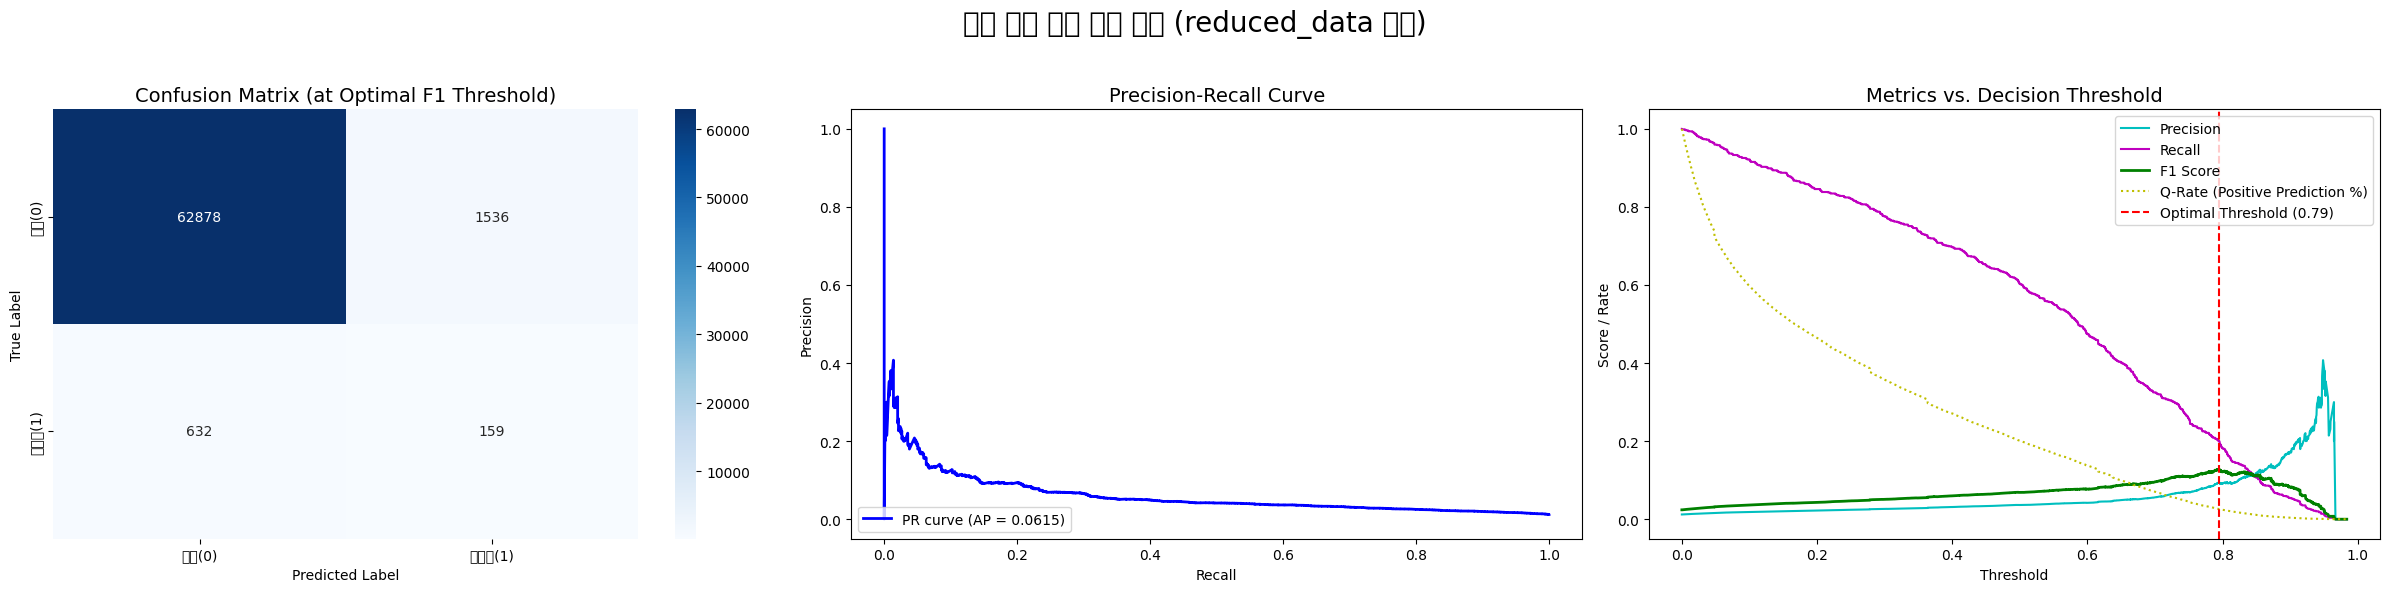

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, precision_recall_curve, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. 데이터 준비 ---
# 가정: 'reduced_data'와 'merged_data'가 이미 로드되어 있음
# 피처(X)는 새로운 'reduced_data'를 사용
X = reduced_data.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y = reduced_data["JDGMNT_WORD_NAME_encoded"]

print(f"새로운 피처 데이터 형태: {X.shape}")
print(f"타겟 데이터 형태: {y.shape}\n")


# --- 2. 데이터 분할 ---
# 이전과 동일한 조건으로 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# --- 3. 클래스 가중치 계산 ---
# 새로운 학습 데이터(y_train)를 기준으로 클래스 가중치를 다시 계산
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"클래스 가중치 (scale_pos_weight): {scale_pos_weight:.2f}\n")


# --- 4. XGBoost 모델 학습 ---
print("================== 🚀 XGBoost 모델 학습 시작 ('reduced_data' 사용) 🚀 ==================\n")

# 이전과 동일한 모델 파라미터 설정
best_params = {
    'subsample': 0.6,
    'n_estimators': 250,
    'max_depth': 5,
    'learning_rate': 0.2,
    'colsample_bytree': 0.8
}

model = XGBClassifier(
    **best_params,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight, # 불균형 가중치 적용
    early_stopping_rounds=20 # early_stopping_rounds를 생성자로 이동
)

# Early stopping을 위한 검증 데이터 분리
X_train_fit, X_eval, y_train_fit, y_eval = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 모델 학습 (Early stopping 적용)
# 20 라운드 동안 검증 세트의 성능이 개선되지 않으면 학습을 조기 종료합니다.
model.fit(X_train_fit, y_train_fit,
          eval_set=[(X_eval, y_eval)],
          verbose=False)


print("XGBoost 모델 학습 완료.\n")


# --- 5. 최종 성능 평가 및 시각화 ---
print("================== ✅ 최종 모델 성능 평가 및 시각화 ✅ ==================\n")

# 예측 확률 계산
y_pred_proba = model.predict_proba(X_test)[:, 1]

# F1-Score를 최대화하는 최적 임계값 찾기
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
f1_scores = np.nan_to_num((2 * precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]))
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]
print(f"F1 Score를 최대화하는 최적 임계값: {optimal_threshold:.4f}\n")

# 최적 임계값으로 최종 예측 생성
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Classification Report 출력
print("--- Classification Report (최적 임계값 기준) ---")
print(classification_report(y_test, y_pred_optimal, digits=4))

# 종합 시각화 (Confusion Matrix, PR Curve, Thresholds plot)
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle(f'최종 모델 성능 종합 평가 (reduced_data 사용)', fontsize=20)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['정상(0)', '부적합(1)'], yticklabels=['정상(0)', '부적합(1)'])
axes[0].set_title('Confusion Matrix (at Optimal F1 Threshold)', fontsize=14)
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# PR Curve
avg_precision = average_precision_score(y_test, y_pred_proba)
axes[1].plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
axes[1].set_title('Precision-Recall Curve', fontsize=14)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc="lower left")

# Metrics vs. Decision Threshold
q_rates = [np.mean(y_pred_proba >= t) for t in thresholds_pr]
axes[2].plot(thresholds_pr, precision[:-1], label='Precision', color='c')
axes[2].plot(thresholds_pr, recall[:-1], label='Recall', color='m')
axes[2].plot(thresholds_pr, f1_scores, label='F1 Score', color='g', lw=2)
axes[2].plot(thresholds_pr, q_rates, label='Q-Rate (Positive Prediction %)', color='y', linestyle=':')
axes[2].axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
axes[2].set_title('Metrics vs. Decision Threshold', fontsize=14)
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Score / Rate')
axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 일단 그냥 pca하여 95% 설명력 같는 변수만 사용하는게 성능 더 높음

# 3. 원본 데이터 전체 pca

In [ ]:
import pandas as pd

merged_data= pd.read_pickle("/content/drive/MyDrive/merged_data.pkl", compression='gzip')
merged_data

,JDGMNT_WORD_NAME_encoded,INSPCT_기타,INSPCT_수거검사,INSPCT_수입검사,INSPCT_압·몰수품검사,INSPCT_자가품질위탁검사,INSPCT_제조.수입품목허가(신고)용검사,PRDLST_건강기능식품(제품),PRDLST_견과 종실류,PRDLST_곡류,...,tmprt_150_50,tmprt_150_51,tmprt_150_52,tmprt_150_53,tmprt_150_54,tmprt_150_55,tmprt_150_56,tmprt_150_57,tmprt_150_58,tmprt_150_59
0,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
1,0,False,False,False,False,True,False,False,False,False,...,10.8,11.8,11.2,11.2,10.6,10.7,9.2,8.1,8.1,12.1
2,0,False,False,False,False,True,False,False,False,False,...,13.9,13.9,12.8,12.4,12.8,11.2,10.4,14.3,14.2,12.7
3,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
4,0,False,False,False,False,True,False,True,False,False,...,11.1,9.2,6.6,4.0,5.1,8.5,8.1,11.6,12.8,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337243,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337244,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337245,0,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337246,0,False,False,False,True,False,False,False,False,False,...,14.4,16.9,15.2,18.3,18.1,15.9,16.4,15.0,14.9,15.7


전체 분산의 95%를 설명하는 데 필요한 주성분 개수: 148개
숫자형 변수 PCA 완료: 540개 → 148개 주성분

불리언 변수(33개)와 PCA 결과(148개) 결합 완료.
최종 피처 데이터 형태: (326021, 181)

클래스 가중치 (scale_pos_pos_weight): 81.48

================== 🚀 XGBoost 모델 학습 시작 (PCA + Bool 변수) 🚀 ==================


XGBoost 모델 학습 완료.

================== ✅ 최종 모델 성능 평가 및 시각화 ✅ ==================

F1 Score를 최대화하는 최적 임계값: 0.8567

--- Classification Report (최적 임계값 기준) ---
              precision    recall  f1-score   support

           0     0.9901    0.9820    0.9861     64414
           1     0.1214    0.2023    0.1517       791

    accuracy                         0.9726     65205
   macro avg     0.5558    0.5921    0.5689     65205
weighted avg     0.9796    0.9726    0.9759     65205



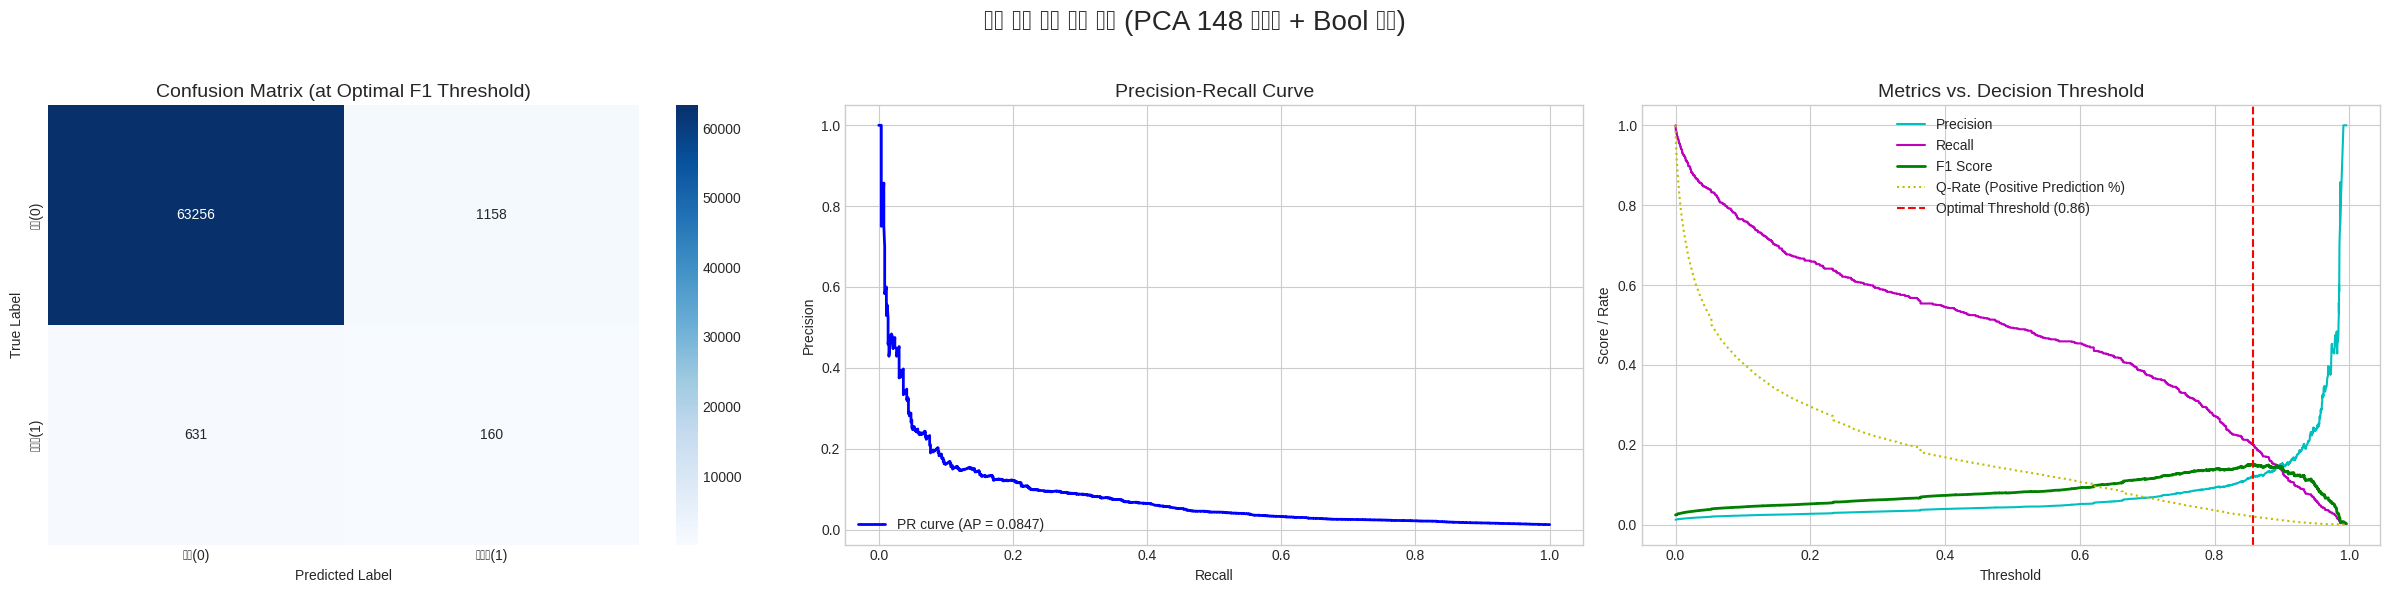

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, precision_recall_curve, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 시각화 한글 폰트 설정 (이전 실행에서 이미 설정되었다고 가정)
# !sudo apt-get install -y fonts-nanum -qq
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')


# ---------------------------------------------------
# 1. 데이터 준비
# ---------------------------------------------------
# merged_data가 이미 로드되어 있다고 가정합니다.

# 타겟 변수와 피처 분리
X_all = merged_data.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y_all = merged_data["JDGMNT_WORD_NAME_encoded"]

# 숫자형 변수와 불리언 변수 분리
X_num = X_all.select_dtypes(include=np.number).copy()
X_bool = X_all.select_dtypes(include='bool').copy()


# ---------------------------------------------------
# 2. 숫자형 변수에 PCA 적용
# ---------------------------------------------------
# 스케일링
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# PCA 수행 (분산의 95%를 설명하는 주성분 개수 사용)
# n_components를 None으로 설정하여 분산 설명력 확인 후 95% 기준 선택
pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_num_scaled)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"전체 분산의 95%를 설명하는 데 필요한 주성분 개수: {n_components_95}개")

# 최종 PCA 모델 생성 및 변환
pca = PCA(n_components=n_components_95, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)

# PCA 결과 DataFrame 생성
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_95)])

print(f"숫자형 변수 PCA 완료: {X_num.shape[1]}개 → {n_components_95}개 주성분\n")


# ---------------------------------------------------
# 3. 불리언 변수와 PCA 결과 결합
# ---------------------------------------------------
# 인덱스 재설정 (merged_data의 인덱스를 따라가도록)
X_bool.index = X_all.index
X_pca_df.index = X_all.index

# 불리언 변수와 PCA 결과 결합
X_processed = pd.concat([X_bool, X_pca_df], axis=1)

print(f"불리언 변수({X_bool.shape[1]}개)와 PCA 결과({X_pca_df.shape[1]}개) 결합 완료.")
print(f"최종 피처 데이터 형태: {X_processed.shape}\n")


# ---------------------------------------------------
# 4. 데이터 분할
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_all, test_size=0.2, random_state=42, stratify=y_all
)

# 클래스 가중치 계산
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"클래스 가중치 (scale_pos_pos_weight): {scale_pos_weight:.2f}\n")


# ---------------------------------------------------
# 5. XGBoost 모델 학습 및 평가
# ---------------------------------------------------
print("================== 🚀 XGBoost 모델 학습 시작 (PCA + Bool 변수) 🚀 ==================\n")

# 모델 파라미터 설정
best_params = {
    'subsample': 0.6,
    'n_estimators': 250,
    'max_depth': 5,
    'learning_rate': 0.2,
    'colsample_bytree': 0.8
}

model = XGBClassifier(
    **best_params,
    eval_metric="logloss", # 또는 aucpr
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight # 불균형 가중치 적용
)

# Early stopping을 위한 학습/검증 데이터 분리
X_train_fit, X_eval, y_train_fit, y_eval = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 모델 학습 (Early stopping 적용 방식 수정)
model.fit(X_train_fit, y_train_fit,
          eval_set=[(X_eval, y_eval)],
          verbose=False) # early_stopping_rounds를 fit 메서드 호출 시 인자로 전달


print("\nXGBoost 모델 학습 완료.\n")


# ---------------------------------------------------
# 6. 최종 성능 평가 및 시각화
# ---------------------------------------------------
print("================== ✅ 최종 모델 성능 평가 및 시각화 ✅ ==================\n")

# 예측 확률 계산
y_pred_proba = model.predict_proba(X_test)[:, 1]

# F1-Score를 최대화하는 최적 임계값 찾기
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
# np.nan을 처리하기 위해 0으로 대체
f1_scores = np.nan_to_num((2 * precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]))
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]
print(f"F1 Score를 최대화하는 최적 임계값: {optimal_threshold:.4f}\n")

# 최적 임계값으로 최종 예측 생성
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Classification Report (Precision, Recall, F1-score) 출력
print("--- Classification Report (최적 임계값 기준) ---")
print(classification_report(y_test, y_pred_optimal, digits=4))

# 종합 시각화 (Confusion Matrix, PR Curve, Thresholds plot)
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle(f'최종 모델 성능 종합 평가 (PCA {n_components_95} 주성분 + Bool 변수)', fontsize=20)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['정상(0)', '부적합(1)'], yticklabels=['정상(0)', '부적합(1)'])
axes[0].set_title('Confusion Matrix (at Optimal F1 Threshold)', fontsize=14)
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# PR Curve
avg_precision = average_precision_score(y_test, y_pred_proba)
axes[1].plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
axes[1].set_title('Precision-Recall Curve', fontsize=14)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc="lower left")

# Metrics vs. Decision Threshold
q_rates = [np.mean(y_pred_proba >= t) for t in thresholds_pr]
axes[2].plot(thresholds_pr, precision[:-1], label='Precision', color='c')
axes[2].plot(thresholds_pr, recall[:-1], label='Recall', color='m')
axes[2].plot(thresholds_pr, f1_scores, label='F1 Score', color='g', lw=2)
axes[2].plot(thresholds_pr, q_rates, label='Q-Rate (Positive Prediction %)', color='y', linestyle=':')
axes[2].axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
axes[2].set_title('Metrics vs. Decision Threshold', fontsize=14)
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Score / Rate')
axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 원본 데이터(60일)에 대한 95% 설명력을 갖는 540개 → 148개 주성분을 사용한 예측이 가장 성능 좋음.

# 4. 점수높은 항목에 대한 somte 적용하여 예측

In [ ]:
import pandas as pd

merged_data= pd.read_pickle("/content/drive/MyDrive/merged_data.pkl", compression='gzip')


✅ 전체 분산의 95%를 설명하는 데 필요한 주성분 개수: 148개
✅ 숫자형 변수 PCA 완료: 540개 → 148개 주성분

✅ 불리언 변수(33개)와 PCA 결과(148개) 결합 완료.
✅ 최종 피처 데이터 형태: (326021, 181)

✅ 데이터 분할 완료 (학습용/ tests용)


================== 🚀 SMOTE 적용 및 모델 학습 시작 🚀 ==================
SMOTE 적용 전 학습 데이터 분포:
JDGMNT_WORD_NAME_encoded
0    257654
1      3162
Name: count, dtype: int64
SMOTE 적용 후 학습 데이터 분포:
JDGMNT_WORD_NAME_encoded
0    257654
1    257654
Name: count, dtype: int64

================== ✅ SMOTE 적용 모델 성능 평가 및 시각화 ✅ ==================
F1 Score를 최대화하는 최적 임계값: 0.6967

--- Classification Report (SMOTE, 최적 임계값 기준) ---
              precision    recall  f1-score   support

           0     0.9897    0.9923    0.9910     64414
           1     0.1994    0.1568    0.1755       791

    accuracy                         0.9821     65205
   macro avg     0.5945    0.5745    0.5832     65205
weighted avg     0.9801    0.9821    0.9811     65205



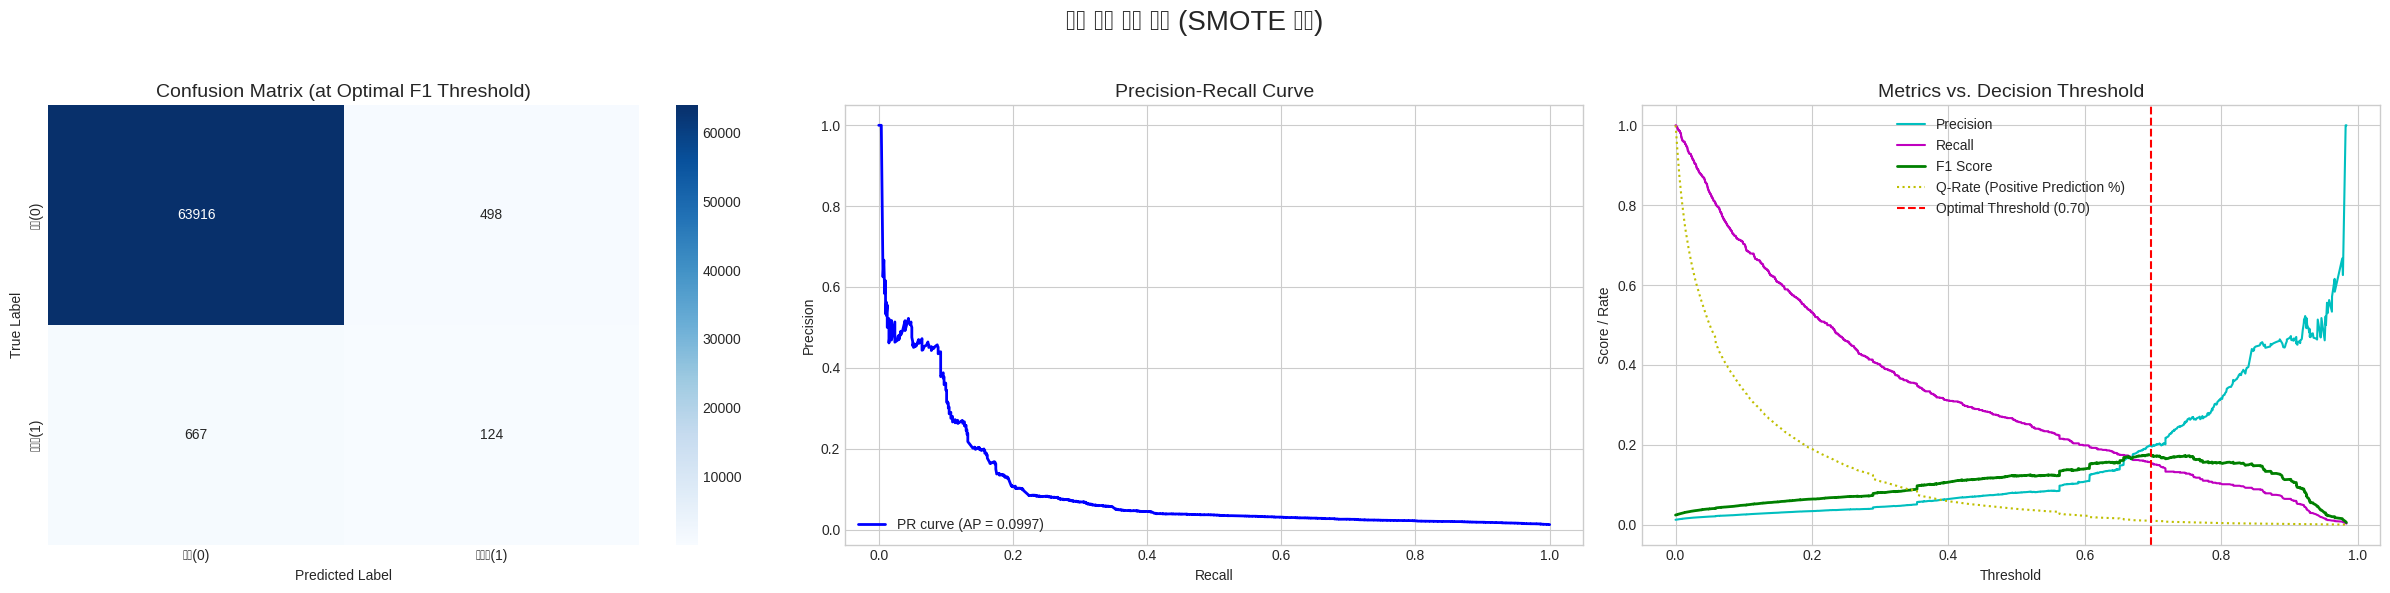


================== 🚀 ADASYN 적용 및 모델 학습 시작 🚀 ==================
ADASYN 적용 전 학습 데이터 분포:
JDGMNT_WORD_NAME_encoded
0    257654
1      3162
Name: count, dtype: int64
ADASYN 적용 후 학습 데이터 분포:
JDGMNT_WORD_NAME_encoded
0    257654
1    257242
Name: count, dtype: int64

================== ✅ ADASYN 적용 모델 성능 평가 및 시각화 ✅ ==================
F1 Score를 최대화하는 최적 임계값: 0.6724

--- Classification Report (ADASYN, 최적 임계값 기준) ---
              precision    recall  f1-score   support

           0     0.9897    0.9906    0.9901     64414
           1     0.1703    0.1568    0.1633       791

    accuracy                         0.9805     65205
   macro avg     0.5800    0.5737    0.5767     65205
weighted avg     0.9797    0.9805    0.9801     65205



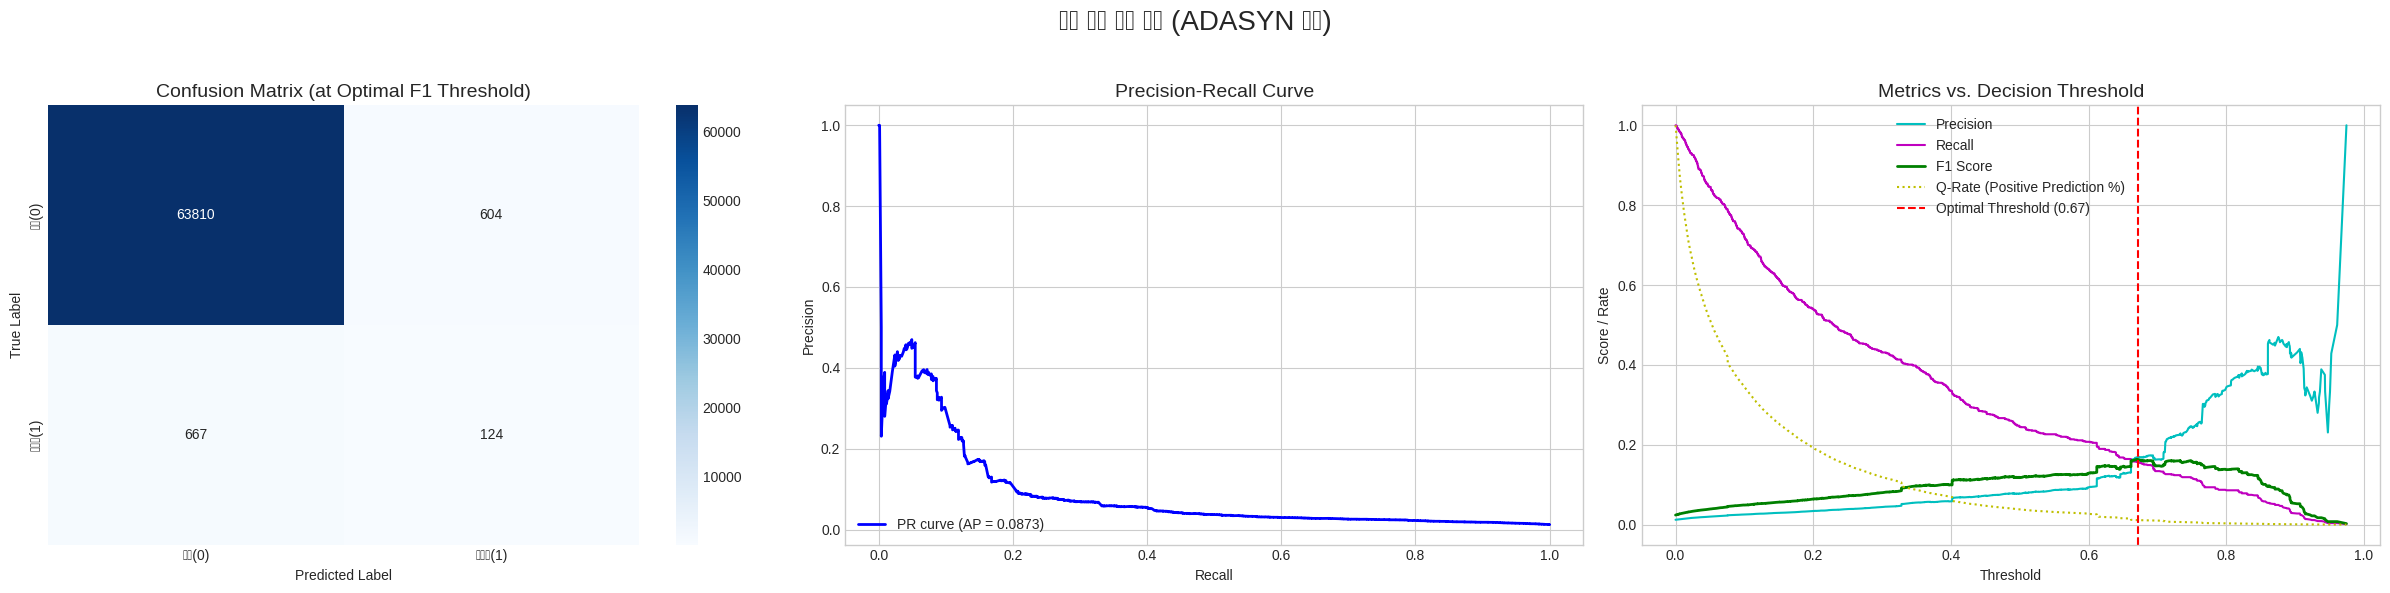



================== 🏆 최종 비교 결과 🏆 ==================
최고 성능을 보인 SMOTE 기법: SMOTE
해당 기법의 F1-score (최적 임계값 기준): 0.1755


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, f1_score, precision_recall_curve,
                             average_precision_score, confusion_matrix)
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 시각화 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')


# ===================================================
# 1. 데이터 준비 및 PCA 적용
# ===================================================
# merged_data가 이미 로드되어 있다고 가정합니다.

# 타겟 변수와 피처 분리
X_all = merged_data.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y_all = merged_data["JDGMNT_WORD_NAME_encoded"]

# 숫자형 변수와 불리언 변수 분리
X_num = X_all.select_dtypes(include=np.number).copy()
X_bool = X_all.select_dtypes(include='bool').copy()

# 스케일링
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# PCA 수행 (분산의 95%를 설명하는 주성분 개수 사용)
pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_num_scaled)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"✅ 전체 분산의 95%를 설명하는 데 필요한 주성분 개수: {n_components_95}개")

# 최종 PCA 모델 생성 및 변환
pca = PCA(n_components=n_components_95, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_95)])
print(f"✅ 숫자형 변수 PCA 완료: {X_num.shape[1]}개 → {n_components_95}개 주성분\n")

# 불리언 변수와 PCA 결과 결합
X_bool.index = X_all.index
X_pca_df.index = X_all.index
X_processed = pd.concat([X_bool, X_pca_df], axis=1)
print(f"✅ 불리언 변수({X_bool.shape[1]}개)와 PCA 결과({X_pca_df.shape[1]}개) 결합 완료.")
print(f"✅ 최종 피처 데이터 형태: {X_processed.shape}\n")


# ===================================================
# 2. 데이터 분할
# ===================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_all, test_size=0.2, random_state=42, stratify=y_all
)
print("✅ 데이터 분할 완료 (학습용/ tests용)\n")


# ===================================================
# 3. SMOTE 기법 비교 및 시각화
# ===================================================
# 비교할 SMOTE 기법 정의
smote_methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
}

# 최적 파라미터 XGBoost 모델 설정
best_params = {
    'subsample': 0.6,
    'n_estimators': 250,
    'max_depth': 5,
    'learning_rate': 0.2,
    'colsample_bytree': 0.8
}
model = XGBClassifier(
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    **best_params
)

# 결과를 저장할 딕셔너리
results = {}

# 반복문으로 SMOTE 기법별 성능 평가 및 시각화
for name, smote in smote_methods.items():
    print(f"\n================== 🚀 {name} 적용 및 모델 학습 시작 🚀 ==================")

    # 학습 데이터에만 오버샘플링 적용
    print(f"{name} 적용 전 학습 데이터 분포:\n{y_train.value_counts()}")
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print(f"{name} 적용 후 학습 데이터 분포:\n{y_resampled.value_counts()}\n")

    # 모델 학습
    model.fit(X_resampled, y_resampled)

    print(f"================== ✅ {name} 적용 모델 성능 평가 및 시각화 ✅ ==================")

    # 예측 확률 계산
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # F1-Score를 최대화하는 최적 임계값 찾기
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = np.nan_to_num((2 * precision * recall) / (precision + recall))
    optimal_idx = np.argmax(f1_scores[:-1]) # 마지막 값은 제외
    optimal_threshold = thresholds_pr[optimal_idx]
    print(f"F1 Score를 최대화하는 최적 임계값: {optimal_threshold:.4f}\n")

    # 최적 임계값으로 최종 예측 생성
    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

    # 결과 저장 (최적 임계값 기준 F1-Score)
    results[name] = f1_score(y_test, y_pred_optimal)

    # Classification Report 출력
    print(f"--- Classification Report ({name}, 최적 임계값 기준) ---")
    print(classification_report(y_test, y_pred_optimal, digits=4))

    # 종합 시각화
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    fig.suptitle(f'모델 성능 종합 평가 ({name} 적용)', fontsize=20)

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_optimal)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['정상(0)', '부적합(1)'], yticklabels=['정상(0)', '부적합(1)'])
    axes[0].set_title('Confusion Matrix (at Optimal F1 Threshold)', fontsize=14)
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    # 2. PR Curve
    avg_precision = average_precision_score(y_test, y_pred_proba)
    axes[1].plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
    axes[1].set_title('Precision-Recall Curve', fontsize=14)
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].legend(loc="lower left")

    # 3. Metrics vs. Decision Threshold
    q_rates = [np.mean(y_pred_proba >= t) for t in thresholds_pr]
    axes[2].plot(thresholds_pr, precision[:-1], label='Precision', color='c')
    axes[2].plot(thresholds_pr, recall[:-1], label='Recall', color='m')
    axes[2].plot(thresholds_pr, f1_scores[:-1], label='F1 Score', color='g', lw=2)
    axes[2].plot(thresholds_pr, q_rates, label='Q-Rate (Positive Prediction %)', color='y', linestyle=':')
    axes[2].axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
    axes[2].set_title('Metrics vs. Decision Threshold', fontsize=14)
    axes[2].set_xlabel('Threshold')
    axes[2].set_ylabel('Score / Rate')
    axes[2].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# ===================================================
# 4. 최종 결과 정리
# ===================================================
if results:
    best_method = max(results, key=results.get)
    print("\n\n================== 🏆 최종 비교 결과 🏆 ==================")
    print(f"최고 성능을 보인 SMOTE 기법: {best_method}")
    print(f"해당 기법의 F1-score (최적 임계값 기준): {results[best_method]:.4f}")
    print("=========================================================")
else:
    print("오류: 모델 성능이 측정되지 않았습니다.")

# 임계값(Threshold) 0.2, 0.3, 0.4 별 혼동행렬(confusion matrix)


In [ ]:
import pandas as pd

merged_data= pd.read_pickle("/content/drive/MyDrive/merged_data.pkl", compression='gzip')


✅ 전체 분산의 95%를 설명하는 데 필요한 주성분 개수: 148개
✅ 숫자형 변수 PCA 완료: 540개 → 148개 주성분

✅ 불리언 변수(33개)와 PCA 결과(148개) 결합 완료.
✅ 최종 피처 데이터 형태: (326021, 181)

✅ 데이터 분할 완료 (학습용/ tests용)


================== 🚀 SMOTE 적용 및 모델 학습 시작 🚀 ==================
SMOTE 적용 전 학습 데이터 분포:
JDGMNT_WORD_NAME_encoded
0    257654
1      3162
Name: count, dtype: int64
SMOTE 적용 후 학습 데이터 분포:
JDGMNT_WORD_NAME_encoded
0    257654
1    257654
Name: count, dtype: int64

================== ✅ SMOTE 적용 모델 성능 평가 및 시각화 ✅ ==================
F1 Score를 최대화하는 최적 임계값: 0.6967


--- Confusion Matrix (SMOTE, Threshold=0.2) ---
[[52494 11920]
 [  371   420]]
              precision    recall  f1-score   support

           0     0.9930    0.8149    0.8952     64414
           1     0.0340    0.5310    0.0640       791

    accuracy                         0.8115     65205
   macro avg     0.5135    0.6730    0.4796     65205
weighted avg     0.9813    0.8115    0.8851     65205



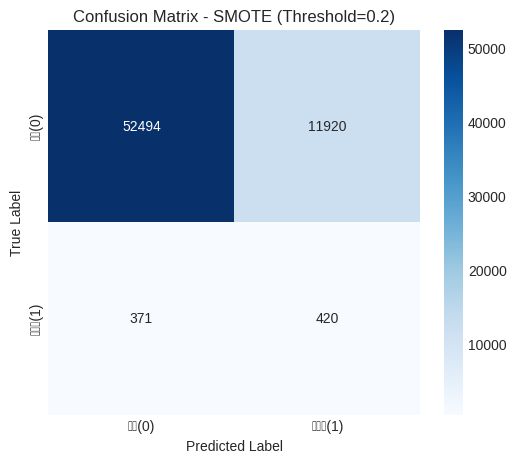


--- Confusion Matrix (SMOTE, Threshold=0.3) ---
[[57638  6776]
 [  475   316]]
              precision    recall  f1-score   support

           0     0.9918    0.8948    0.9408     64414
           1     0.0446    0.3995    0.0802       791

    accuracy                         0.8888     65205
   macro avg     0.5182    0.6471    0.5105     65205
weighted avg     0.9803    0.8888    0.9304     65205



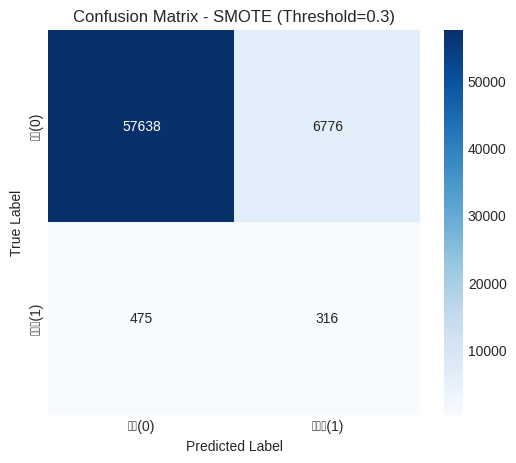


--- Confusion Matrix (SMOTE, Threshold=0.4) ---
[[60827  3587]
 [  545   246]]
              precision    recall  f1-score   support

           0     0.9911    0.9443    0.9672     64414
           1     0.0642    0.3110    0.1064       791

    accuracy                         0.9366     65205
   macro avg     0.5276    0.6277    0.5368     65205
weighted avg     0.9799    0.9366    0.9567     65205



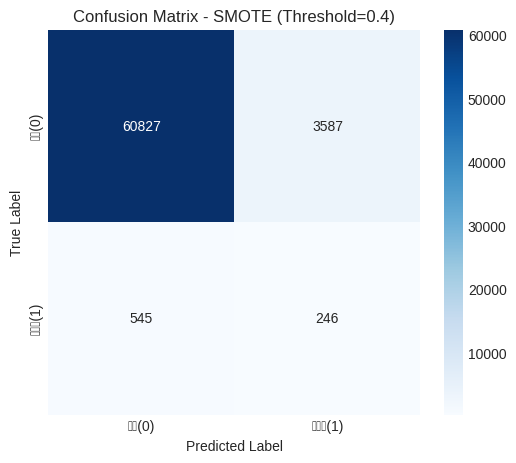


================== 🚀 ADASYN 적용 및 모델 학습 시작 🚀 ==================
ADASYN 적용 전 학습 데이터 분포:
JDGMNT_WORD_NAME_encoded
0    257654
1      3162
Name: count, dtype: int64
ADASYN 적용 후 학습 데이터 분포:
JDGMNT_WORD_NAME_encoded
0    257654
1    257242
Name: count, dtype: int64

================== ✅ ADASYN 적용 모델 성능 평가 및 시각화 ✅ ==================
F1 Score를 최대화하는 최적 임계값: 0.6724


--- Confusion Matrix (ADASYN, Threshold=0.2) ---
[[52307 12107]
 [  364   427]]
              precision    recall  f1-score   support

           0     0.9931    0.8120    0.8935     64414
           1     0.0341    0.5398    0.0641       791

    accuracy                         0.8087     65205
   macro avg     0.5136    0.6759    0.4788     65205
weighted avg     0.9815    0.8087    0.8834     65205



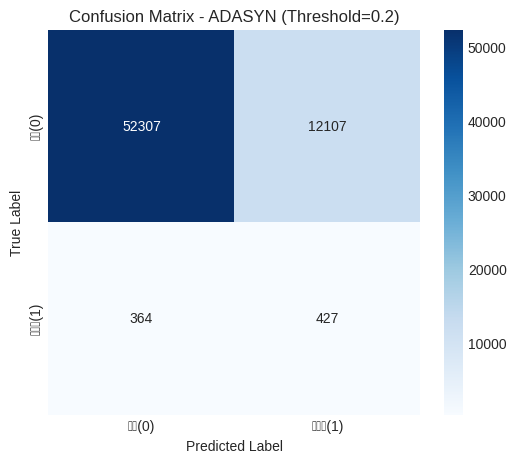


--- Confusion Matrix (ADASYN, Threshold=0.3) ---
[[57009  7405]
 [  450   341]]
              precision    recall  f1-score   support

           0     0.9922    0.8850    0.9355     64414
           1     0.0440    0.4311    0.0799       791

    accuracy                         0.8795     65205
   macro avg     0.5181    0.6581    0.5077     65205
weighted avg     0.9807    0.8795    0.9252     65205



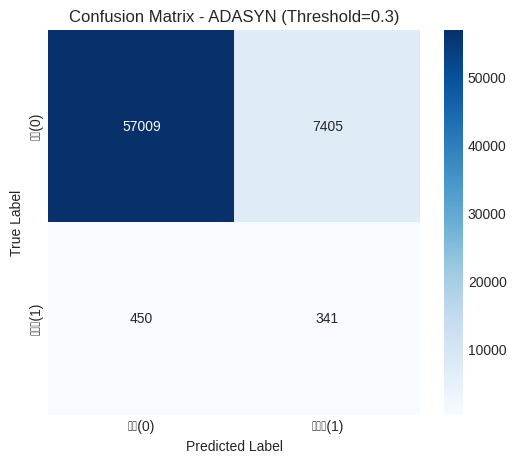


--- Confusion Matrix (ADASYN, Threshold=0.4) ---
[[60138  4276]
 [  526   265]]
              precision    recall  f1-score   support

           0     0.9913    0.9336    0.9616     64414
           1     0.0584    0.3350    0.0994       791

    accuracy                         0.9264     65205
   macro avg     0.5248    0.6343    0.5305     65205
weighted avg     0.9800    0.9264    0.9511     65205



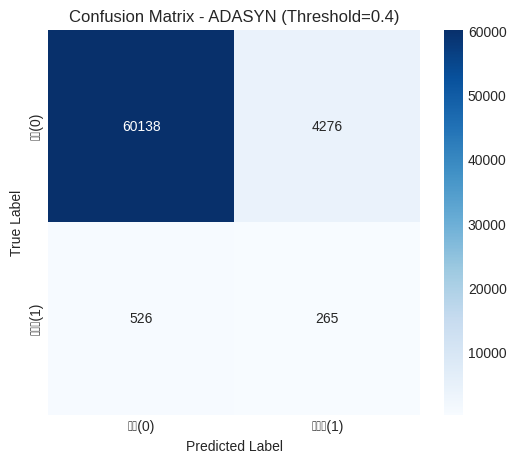



================== 🏆 최종 비교 결과 🏆 ==================
최고 성능을 보인 SMOTE 기법: SMOTE
해당 기법의 F1-score (최적 임계값 기준): 0.1755


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, f1_score, precision_recall_curve,
                             average_precision_score, confusion_matrix)
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 시각화 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')


# ===================================================
# 1. 데이터 준비 및 PCA 적용
# ===================================================
# merged_data가 이미 로드되어 있다고 가정합니다.

# 타겟 변수와 피처 분리
X_all = merged_data.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y_all = merged_data["JDGMNT_WORD_NAME_encoded"]

# 숫자형 변수와 불리언 변수 분리
X_num = X_all.select_dtypes(include=np.number).copy()
X_bool = X_all.select_dtypes(include='bool').copy()

# 스케일링
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# PCA 수행 (분산의 95%를 설명하는 주성분 개수 사용)
pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_num_scaled)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"✅ 전체 분산의 95%를 설명하는 데 필요한 주성분 개수: {n_components_95}개")

# 최종 PCA 모델 생성 및 변환
pca = PCA(n_components=n_components_95, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_95)])
print(f"✅ 숫자형 변수 PCA 완료: {X_num.shape[1]}개 → {n_components_95}개 주성분\n")

# 불리언 변수와 PCA 결과 결합
X_bool.index = X_all.index
X_pca_df.index = X_all.index
X_processed = pd.concat([X_bool, X_pca_df], axis=1)
print(f"✅ 불리언 변수({X_bool.shape[1]}개)와 PCA 결과({X_pca_df.shape[1]}개) 결합 완료.")
print(f"✅ 최종 피처 데이터 형태: {X_processed.shape}\n")


# ===================================================
# 2. 데이터 분할
# ===================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_all, test_size=0.2, random_state=42, stratify=y_all
)
print("✅ 데이터 분할 완료 (학습용/ tests용)\n")


# ===================================================
# 3. SMOTE 기법 비교 및 시각화 (수정 버전)
# ===================================================
# 비교할 SMOTE 기법 정의
smote_methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
}

# 최적 파라미터 XGBoost 모델 설정
best_params = {
    'subsample': 0.6,
    'n_estimators': 250,
    'max_depth': 5,
    'learning_rate': 0.2,
    'colsample_bytree': 0.8
}
model = XGBClassifier(
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    **best_params
)

# 결과를 저장할 딕셔너리
results = {}

# 반복문으로 SMOTE 기법별 성능 평가 및 시각화
for name, smote in smote_methods.items():
    print(f"\n================== 🚀 {name} 적용 및 모델 학습 시작 🚀 ==================")

    # 학습 데이터에만 오버샘플링 적용
    print(f"{name} 적용 전 학습 데이터 분포:\n{y_train.value_counts()}")
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print(f"{name} 적용 후 학습 데이터 분포:\n{y_resampled.value_counts()}\n")

    # 모델 학습
    model.fit(X_resampled, y_resampled)

    print(f"================== ✅ {name} 적용 모델 성능 평가 및 시각화 ✅ ==================")

    # 예측 확률 계산
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # F1-Score를 최대화하는 최적 임계값 찾기
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = np.nan_to_num((2 * precision * recall) / (precision + recall))
    optimal_idx = np.argmax(f1_scores[:-1])  # 마지막 값 제외
    optimal_threshold = thresholds_pr[optimal_idx]
    print(f"F1 Score를 최대화하는 최적 임계값: {optimal_threshold:.4f}\n")

    # ------------------------------
    # Threshold 0.2, 0.3, 0.4 비교
    # ------------------------------
    fixed_thresholds = [0.2, 0.3, 0.4]
    for th in fixed_thresholds:
        y_pred_fixed = (y_pred_proba >= th).astype(int)
        cm_fixed = confusion_matrix(y_test, y_pred_fixed)
        print(f"\n--- Confusion Matrix ({name}, Threshold={th}) ---")
        print(cm_fixed)
        print(classification_report(y_test, y_pred_fixed, digits=4))

        # 시각화
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm_fixed, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['정상(0)', '부적합(1)'],
                    yticklabels=['정상(0)', '부적합(1)'])
        plt.title(f'Confusion Matrix - {name} (Threshold={th})')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    # ------------------------------
    # 최적 임계값 결과 저장
    # ------------------------------
    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
    results[name] = f1_score(y_test, y_pred_optimal)


# ===================================================
# 4. 최종 결과 정리
# ===================================================
if results:
    best_method = max(results, key=results.get)
    print("\n\n================== 🏆 최종 비교 결과 🏆 ==================")
    print(f"최고 성능을 보인 SMOTE 기법: {best_method}")
    print(f"해당 기법의 F1-score (최적 임계값 기준): {results[best_method]:.4f}")
    print("=========================================================")
else:
    print("오류: 모델 성능이 측정되지 않았습니다.")


# 비지도 클러스터링(군집분석)으로 데이터를 2개의 라벨로 나누고 실제 Y값과 얼마나 잘 들어 맞는지 비지도 클러스터링(군집분석)으로 데이터를 2개의 라벨로 나누고 실제 Y값과 얼마나 잘 들어 맞는지

🚀 데이터 전처리 시작...
✅ 전처리 완료. 최종 피처 데이터 형태: (326021, 181)

🚀 K-Means 군집분석 시작 (n_clusters=2)...
✅ 군집분석 완료.

🔹 군집 레이블이 실제 y값과 방향이 일치합니다.

================== ✅ 군집분석 성능 평가 ✅ ==================
--- 군집분석 성능 지표 ---
Adjusted Rand Index (ARI): -0.0002
Homogeneity: 0.0002, Completeness: 0.0000, V-measure: 0.0000

--- 분류 성능 관점 리포트 ---
              precision    recall  f1-score   support

           0     0.9874    0.5520    0.7081    322068
           1     0.0115    0.4258    0.0225      3953

    accuracy                         0.5505    326021
   macro avg     0.4995    0.4889    0.3653    326021
weighted avg     0.9756    0.5505    0.6998    326021



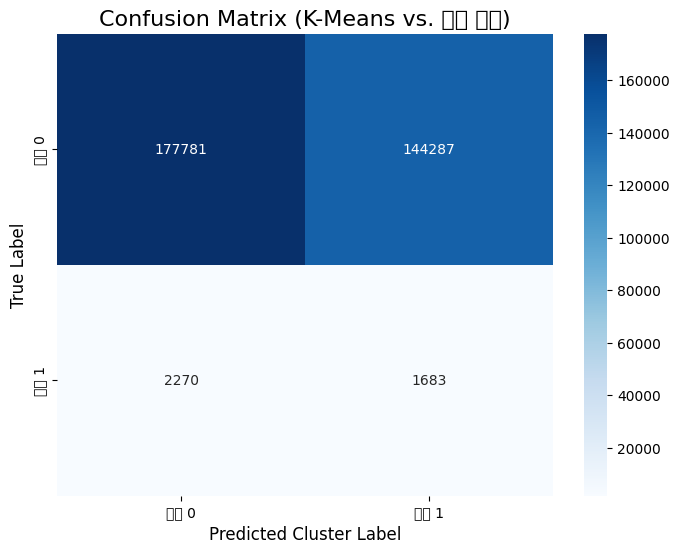


================== 📊 군집 결과 시각화 📊 ==================


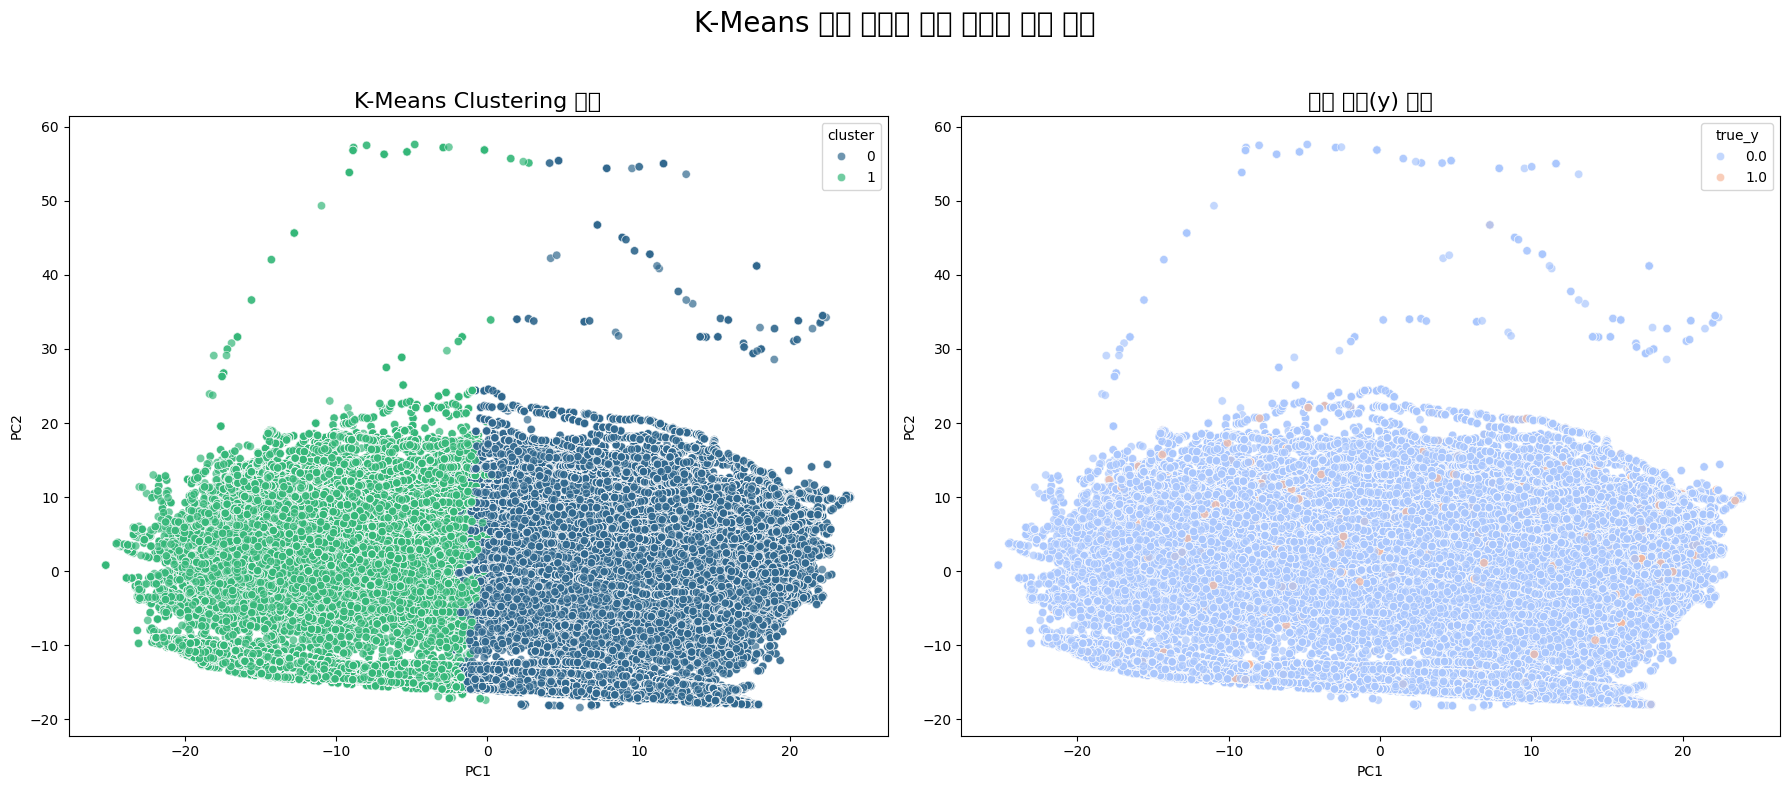

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (confusion_matrix, classification_report,
                             adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')




# 1. 데이터 준비 및 PCA 전처리 (처음부터 시작)
merged_data= pd.read_pickle("/content/drive/MyDrive/merged_data.pkl", compression='gzip')

print("🚀 데이터 전처리 시작...")

# --- 1.1. 피처(X)와 타겟(y) 분리 ---
X_all = merged_data.drop(columns=["JDGMNT_WORD_NAME_encoded"])
y_all = merged_data["JDGMNT_WORD_NAME_encoded"]

# --- 1.2. 숫자형/불리언 변수 분리 및 스케일링 ---
X_num = X_all.select_dtypes(include=np.number).copy()
X_bool = X_all.select_dtypes(include='bool').copy()
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# --- 1.3. PCA로 차원 축소 ---
pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_num_scaled)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
pca = PCA(n_components=n_components_95, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_95)])

# --- 1.4. 최종 데이터셋 'X_processed' 생성 ---
X_bool.index = X_all.index
X_pca_df.index = X_all.index
X_processed = pd.concat([X_bool, X_pca_df], axis=1)

print(f"✅ 전처리 완료. 최종 피처 데이터 형태: {X_processed.shape}\n")


# ===================================================
# 2. K-Means 군집분석 수행
# ===================================================
print("🚀 K-Means 군집분석 시작 (n_clusters=2)...")
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_processed)
print("✅ 군집분석 완료.\n")


# ===================================================
# 3. 군집 레이블 정렬
# ===================================================
cm = confusion_matrix(y_all, cluster_labels)
if cm[0,0] + cm[1,1] < cm[0,1] + cm[1,0]:
    aligned_labels = 1 - cluster_labels
    print("🔹 군집 레이블이 실제 y값과 반대되어 정렬(flip)되었습니다.\n")
else:
    aligned_labels = cluster_labels
    print("🔹 군집 레이블이 실제 y값과 방향이 일치합니다.\n")


# ===================================================
# 4. 성능 평가
# ===================================================
print("================== ✅ 군집분석 성능 평가 ✅ ==================")
# --- 4.1. 군집분석 고유 평가지표 ---
ari_score = adjusted_rand_score(y_all, aligned_labels)
h_score = homogeneity_score(y_all, aligned_labels)
c_score = completeness_score(y_all, aligned_labels)
v_score = v_measure_score(y_all, aligned_labels)

print("--- 군집분석 성능 지표 ---")
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Homogeneity: {h_score:.4f}, Completeness: {c_score:.4f}, V-measure: {v_score:.4f}\n")

# --- 4.2. 분류 성능 관점 평가지표 ---
print("--- 분류 성능 관점 리포트 ---")
print(classification_report(y_all, aligned_labels, digits=4))

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
cm_aligned = confusion_matrix(y_all, aligned_labels)
sns.heatmap(cm_aligned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['군집 0', '군집 1'], yticklabels=['실제 0', '실제 1'])
plt.title('Confusion Matrix (K-Means vs. 실제 라벨)', fontsize=16)
plt.xlabel('Predicted Cluster Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


# ===================================================
# 5. 군집 결과 시각화
# ===================================================
print("\n================== 📊 군집 결과 시각화 📊 ==================")
# 시각화를 위해 PCA로 2차원으로 축소
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_processed)

# 시각화용 데이터프레임 생성
df_viz = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_viz['cluster'] = aligned_labels
df_viz['true_y'] = y_all

# K-Means 군집 결과와 실제 라벨 분포 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('K-Means 군집 결과와 실제 데이터 분포 비교', fontsize=20)

# 1. K-Means 군집 결과
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.7, ax=axes[0])
axes[0].set_title('K-Means Clustering 결과', fontsize=16)

# 2. 실제 라벨(y) 분포
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='true_y', palette='coolwarm', alpha=0.7, ax=axes[1])
axes[1].set_title('실제 라벨(y) 분포', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 이 코드는 다음과 같은 순서로 진행됩니다.

1. K-Means 군집분석 수행: X_processed 데이터를 사용하여 라벨 정보 없이 순수하게 데이터의 특성만으로 2개의 그룹으로 나눕니다.

2. 레이블 정렬: K-Means가 할당한 군집 번호(0, 1)와 실제 y값(0, 1)이 서로 의미가 맞도록 정렬합니다. (예: 군집 0이 실제 라벨 1에 더 가깝다면, 군집 0을 1로 간주)

3. 성능 평가: 정렬된 군집 라벨과 실제 y값을 비교하여 혼동 행렬(Confusion Matrix)과 분류 리포트(Classification Report)를 출력합니다. 군집분석 성능을 나타내는 ARI 점수 등도 함께 확인합니다.

4. 시각화: PCA를 이용해 2차원으로 축소된 데이터에 군집 결과와 실제 y값을 각각 시각화하여 직관적으로 비교합니다.



# 부적합률 조정
---
최초 60일 데이터에 결과 값 기준으로 부적합률을 최대 20%까지 올리면 예측성능이 상승 할 수 있음
